# A Classification Model to Classify the Side Effects of a specific Drug

The project aims to develop a classification model that identifies the potential side effects of a given drug based on patient data. This is a important effort as it has the potential to revolutionize personalized medicine, enabling healthcare providers to predict adverse reactions in patients and adjust treatment plans accordingly.

# Importing all the required libraries

In [1]:
import numpy as np
import pandas as pd
from random import choice, sample
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

import itertools
import keras
import math
import re
import string
import spacy
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

from collections import Counter
from nltk.corpus import stopwords

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as sklearn_stop_words
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Loading Dataset

In [2]:
data = pd.read_csv('drugdata.csv')

In [3]:
data

Age      Condition        Date                          Drug   
0       75 or over    Stuffy Nose   9/21/2014                  25dph-7.5peh  \
1            25-34  Cold Symptoms   1/13/2011                  25dph-7.5peh   
2            65-74          Other   7/16/2012  warfarin (bulk) 100 % powder   
3       75 or over          Other   9/23/2010  warfarin (bulk) 100 % powder   
4            35-44          Other  01-06-2009  warfarin (bulk) 100 % powder   
...            ...            ...         ...                           ...   
362801       55-64   Stop Smoking  11/14/2008                       chantix   
362802                      Other  11/14/2008                       chantix   
362803       25-34   Stop Smoking  11/13/2008                       chantix   
362804       55-64   Stop Smoking  11/13/2008                       chantix   
362805       45-54   Stop Smoking  11-12-2008                       chantix   

        DrugId  EaseofUse  Effectiveness   
0       146724          5              5  \
1       146724          5              5   
2       144731          2              3   
3       144731          2              2   
4       144731          1              1   
...        ...        ...            ...   
362801  144470          5              5   
362802  144470          2              3   
362803  144470          2              4   
362804  144470          5              5   
362805  144470          4              5   

                                                  Reviews  Satisfaction   
0       I'm a retired physician and of all the meds I ...             5  \
1       cleared me right up even with my throat hurtin...             5   
2       why did my PTINR go from a normal of 2.5 to ov...             3   
3                            FALLING AND DON'T REALISE IT             1   
4       My grandfather was prescribed this medication ...             1   
...                                                   ...           ...   
362801  I took the whole 12 weeks.I could have stopped...             5   
362802  My dad strated taking Chantix about 1 month ag...             1   
362803  As long as I was on chantix, I didn't smoke.  ...             2   
362804  Started this medication Oct 5th 2008. Haven't ...             5   
362805  One year ago, I tried Chantix and had to stop ...             5   

        Gender                                              Sides  UsefulCount  
0         Male  Drowsiness,  dizziness ,  dry mouth /nose/thro...            0  
1       Female  Drowsiness,  dizziness ,  dry mouth /nose/thro...            1  
2       Female                                                               0  
3       Female                                                               0  
4         Male                                                               1  
...        ...                                                ...          ...  
362801  Female  Nausea ,  headache ,  vomiting , drowsiness, g...            2  
362802          Nausea ,  headache ,  vomiting , drowsiness, g...           16  
362803  Female  Nausea ,  headache ,  vomiting , drowsiness, g...            3  
362804    Male  Nausea ,  headache ,  vomiting , drowsiness, g...            1  
362805  Female  Nausea ,  headache ,  vomiting , drowsiness, g...            3  

[362806 rows x 12 columns]

#### Description of the dataset
Name : Name of the patient

Race : Race of the patient

Age : Age of the patient

Condition : Condition/symptom from which the patient is suffering

Date : Date of usage

Drug : Name of the drug

DrugId : Identity/code of drug

EaseofUse : Patient's 10-Star rating on the ease of use of drug

Effectiveness : Patient's 10-Star rating on the effectiveness of drug

Reviews : Patient's review

Satisfaction : Patient's 10-Star rating on satisfaction

Gender : Gender of the patient

Sides : Side effects of the drug

UsefulCount : Number of users who found the review useful

## Data Inspecting:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Age            362806 non-null  object
 1   Condition      362806 non-null  object
 2   Date           362806 non-null  object
 3   Drug           362806 non-null  object
 4   DrugId         362806 non-null  int64 
 5   EaseofUse      362806 non-null  int64 
 6   Effectiveness  362806 non-null  int64 
 7   Reviews        362763 non-null  object
 8   Satisfaction   362806 non-null  int64 
 9   Gender         362806 non-null  object
 10  Sides          362806 non-null  object
 11  UsefulCount    362806 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 33.2+ MB


In [5]:
data.columns

Index(['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Reviews', 'Satisfaction', 'Gender', 'Sides',
       'UsefulCount'],
      dtype='object')

In [6]:
data.describe()

DrugId      EaseofUse  Effectiveness   Satisfaction   
count  362806.000000  362806.000000  362806.000000  362806.000000  \
mean    36879.370774       4.019829       3.532061       3.135408   
std     52624.412971       1.317711       1.455961       1.611106   
min         1.000000       1.000000       1.000000       1.000000   
25%      4896.000000       3.000000       3.000000       1.000000   
50%      9548.000000       5.000000       4.000000       3.000000   
75%     63522.000000       5.000000       5.000000       5.000000   
max    178546.000000      10.000000      10.000000      10.000000   

         UsefulCount  
count  362806.000000  
mean        6.744916  
std         9.324240  
min         0.000000  
25%         1.000000  
50%         4.000000  
75%         9.000000  
max       255.000000

In [7]:
print(data[['Drug', 'Condition']].head(15))

                                       Drug                      Condition
0                              25dph-7.5peh                    Stuffy Nose
1                              25dph-7.5peh                  Cold Symptoms
2              warfarin (bulk) 100 % powder                          Other
3              warfarin (bulk) 100 % powder                          Other
4              warfarin (bulk) 100 % powder                          Other
5              warfarin (bulk) 100 % powder                          Other
6                                 wymzya fe                  Birth Control
7                                 wymzya fe  Disease of Ovaries with Cysts
8                                 wymzya fe                           Acne
9   12 hour nasal relief spray, non-aerosol                    Stuffy Nose
10                      pyrogallol crystals                          Other
11                                     lyza                  Birth Control
12                       

In [8]:
print('\n The time period of collecting the data')
print('starting date :',data['Date'].min())
print('Ending date :',data['Date'].max())


 The time period of collecting the data
starting date : 01-01-2008
Ending date : 9/30/2019


#### Top 20 drugs that are most effective and the corresponding conditions:

In [9]:
df_effective = pd.DataFrame(data.groupby(['Drug','Condition'])['Effectiveness'].mean().reset_index())
df_effective.sort_values(by = 'Effectiveness', ascending = False).iloc[:20]

Drug   
21668                               zzzquil  \
14218               norgestrel-ethiny estra   
14224                          norinyl 1+35   
14226                          norinyl 1+35   
14227                          norinyl 1+35   
14231                               norpace   
14234                               norpace   
14236                            norpace cr   
14244                              northera   
14253  nortrel 1/35 (21) 1 mg-35 mcg tablet   
4466                         clarithromycin   
14270                        nortrel tablet   
14283                                norvir   
14284      norvir 100 mg oral powder packet   
14285                        norvir capsule   
4457                         clarithromycin   
14289                      novaferrum drops   
4448                               claravis   
14293                          novarel vial   
14223                          norinyl 1+35   

                                               Condition  Effectiveness  
21668                                        Stuffy Nose            5.0  
14218                   Abnormally Long or Heavy Periods            5.0  
14224                   Abnormally Long or Heavy Periods            5.0  
14226                                      Birth Control            5.0  
14227                                    Painful Periods            5.0  
14231  Atrial Fibrillation Electrically Shocked to No...            5.0  
14234            Paroxysmal Supraventricular Tachycardia            5.0  
14236  Atrial Fibrillation Electrically Shocked to No...            5.0  
14244                                              Other            5.0  
14253                       Absence of Menstrual Periods            5.0  
4466         Bacterial Pneumonia caused by Streptococcus            5.0  
14270                                      Birth Control            5.0  
14283                                                HIV            5.0  
14284                                                HIV            5.0  
14285                                                HIV            5.0  
4457            Acute Bacterial Infection of the Sinuses            5.0  
14289                                              Other            5.0  
4448           Severe Difficult to Treat Nodular Rosacea            5.0  
14293                    Stimulation of Ovarian Function            5.0  
14223                  Abnormal Bleeding from the Uterus            5.0

#### Top 20 drugs that have the highest avg ease of use level and the corresponding condition:

In [10]:
df_ease = pd.DataFrame(data.groupby(['Drug','Condition'])['EaseofUse'].mean().reset_index())
df_ease.sort_values(by = 'EaseofUse', ascending = False).iloc[:20]

Drug   
21668                              zzzquil  \
11235                    levofloxacin vial   
11215                levofloxacin solution   
11218                levofloxacin solution   
3753   ceftriaxone vial with threaded port   
11221                levofloxacin solution   
11227                levofloxacin solution   
11229                levofloxacin solution   
11230                levofloxacin solution   
11231                levofloxacin solution   
11237                    levofloxacin vial   
11193                         levofloxacin   
11241          levoleucovorin calcium vial   
11242        levomefolate-b2-b6-b12 tablet   
11243        levomefolate-b2-b6-b12 tablet   
11245                             levonest   
11253         levonorgestrel-eth estradiol   
11254         levonorgestrel-eth estradiol   
11256         levonorgestrel-eth estradiol   
3738      ceftin suspension, reconstituted   

                                               Condition  EaseofUse  
21668                                        Stuffy Nose        5.0  
11235                  Bacterial Urinary Tract Infection        5.0  
11215  Bronchitis caused by the Bacteria Moraxella Ca...        5.0  
11218   Chronic Infection of the Prostate due to E. coli        5.0  
3753                           Arthritis in Lyme Disease        5.0  
11221  Complicated Skin Infection due to Staphyloccus...        5.0  
11227  Prevention of Plague Following Exposure to Plague        5.0  
11229  Staphylococcus Saprophyticus Infection of Urin...        5.0  
11230                             TB involving the Lungs        5.0  
11231           Treatment to Prevent Traveler's Diarrhea        5.0  
11237    Urinary Tract Infection due to E. Coli Bacteria        5.0  
11193           Treatment to Prevent Traveler's Diarrhea        5.0  
11241                                              Other        5.0  
11242                                   Lack in Vitamins        5.0  
11243            Treatment To Prevent Vitamin Deficiency        5.0  
11245                                      Birth Control        5.0  
11253                  Abnormal Bleeding from the Uterus        5.0  
11254                   Abnormally Long or Heavy Periods        5.0  
11256                                      Endometriosis        5.0  
3738   Bronchitis caused by the Bacteria Streptococcu...        5.0

## Adding names and race to the dataframe.

In [11]:
from mimesis import Person
person = Person('en')

# function to create names to exact rows
def fake_names(n):
   name = []
   for _ in range(0, n):
        name.append(person.name())
   return name

names = fake_names(362806)

data_name = pd.DataFrame(list(zip(names)),columns = ['Name'])

data_name.head()

Name
0  Alexander
1    Avelina
2       Greg
3    Francie
4     Fallon

In [12]:
import random

options = [("White", 0.32), ("Hispanic", 0.28), ("Black", 0.22), ("Asian", 0.18)]
words = []

for i in range(362806):
    word = random.choices([o[0] for o in options], [o[1] for o in options])[0]
    words.append(word)

data_race=pd.DataFrame(words, columns = ['Race'])

data_race.head()

Race
0  Hispanic
1  Hispanic
2     White
3  Hispanic
4     Black

In [13]:
data1 = pd.concat([data_name, data_race, data], axis=1).reindex(data.index)
data1.head()

Name      Race         Age      Condition        Date   
0  Alexander  Hispanic  75 or over    Stuffy Nose   9/21/2014  \
1    Avelina  Hispanic       25-34  Cold Symptoms   1/13/2011   
2       Greg     White       65-74          Other   7/16/2012   
3    Francie  Hispanic  75 or over          Other   9/23/2010   
4     Fallon     Black       35-44          Other  01-06-2009   

                           Drug  DrugId  EaseofUse  Effectiveness   
0                  25dph-7.5peh  146724          5              5  \
1                  25dph-7.5peh  146724          5              5   
2  warfarin (bulk) 100 % powder  144731          2              3   
3  warfarin (bulk) 100 % powder  144731          2              2   
4  warfarin (bulk) 100 % powder  144731          1              1   

                                             Reviews  Satisfaction  Gender   
0  I'm a retired physician and of all the meds I ...             5    Male  \
1  cleared me right up even with my throat hurtin...             5  Female   
2  why did my PTINR go from a normal of 2.5 to ov...             3  Female   
3                       FALLING AND DON'T REALISE IT             1  Female   
4  My grandfather was prescribed this medication ...             1    Male   

                                               Sides  UsefulCount  
0  Drowsiness,  dizziness ,  dry mouth /nose/thro...            0  
1  Drowsiness,  dizziness ,  dry mouth /nose/thro...            1  
2                                                               0  
3                                                               0  
4                                                               1

In [14]:
# Total unique values in columns

print("unique values in Name column:\n",data1['Name'].unique())
print("unique values in Age column:\n",data1['Age'].unique())
print("\n unique values in Gender column:\n",data1['Gender'].unique())
print("\n unique values in Drug column:\n",data1['Drug'].unique())
print("\n unique values in Condition column:\n",data1['Condition'].unique())
print("\n unique values in Sidescolumn:\n",data1['Sides'].unique())

unique values in Name column:
 ['Alexander' 'Avelina' 'Greg' ... 'Anamaria' 'Edra' 'Dede']
unique values in Age column:
 ['75 or over' '25-34' '65-74' '35-44' '55-64' '45-54' '19-24' ' ' '13-18'
 '07-Dec' '0-2' '03-Jun']

 unique values in Gender column:
 ['Male' 'Female' ' ']

 unique values in Drug column:
 ['25dph-7.5peh' 'warfarin (bulk) 100 % powder' 'wymzya fe' ...
 'chest congestion relief dm' 'chantix' 'chateal']

 unique values in Condition column:
 ['Stuffy Nose' 'Cold Symptoms' 'Other' ...
 'Combative and Explosive Behavior' 'Lead Poisoning'
 'Poisoning from Swallowed Unknown Substance']

 unique values in Sidescolumn:
 ['Drowsiness,  dizziness ,  dry mouth /nose/throat,  headache ,  upset stomach ,  constipation , or  trouble sleeping  may occur.'
 ' '
 'Nausea ,  vomiting ,  headache ,  bloating ,  breast  tenderness, swelling of the  ankles /feet (fluid retention), or  weight  change may occur.'
 ...
 'Drowsiness,  dizziness ,  nausea ,  constipation ,  blurred vision , o

In [15]:
# Unique value count
for i in data1.columns:
    print(i,':',data1[i].nunique(),'\n')

Name : 3323 

Race : 4 

Age : 12 

Condition : 1806 

Date : 4524 

Drug : 7093 

DrugId : 6572 

EaseofUse : 7 

Effectiveness : 7 

Reviews : 250158 

Satisfaction : 7 

Gender : 3 

Sides : 1651 

UsefulCount : 148 



# Dataset is ready for EDA and Preprocessing

# A drug named Lisinopril solution with DrugId 6873 is selected in building a classification model to determine side effects

In [16]:
data2 = data1[data1.DrugId == 6873]

# Missing Value Handling

In [17]:
data2.isna().sum()

Name             0
Race             0
Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          4
Satisfaction     0
Gender           0
Sides            0
UsefulCount      0
dtype: int64

In [18]:
# Nan rows were dropped
data2.dropna(axis = 0, inplace = True)
data2.isna().sum()

Name             0
Race             0
Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          0
Satisfaction     0
Gender           0
Sides            0
UsefulCount      0
dtype: int64

In [19]:
# Handling instances with whitespaces
for i in data2:
    data2[i]=np.where(data2[i]==" ",np.NAN,data2[i])
    
data2.isna().sum()

Name                0
Race                0
Age               270
Condition           0
Date                0
Drug                0
DrugId              0
EaseofUse           0
Effectiveness       0
Reviews          1562
Satisfaction        0
Gender            494
Sides               0
UsefulCount         0
dtype: int64

In [20]:
data2.dropna(axis=0, inplace = True)
data2.isna().sum()

Name             0
Race             0
Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          0
Satisfaction     0
Gender           0
Sides            0
UsefulCount      0
dtype: int64

In [21]:
# Handling instances with double whitespaces
for i in data2:
    data2[i]=np.where(data2[i]=="  ",np.NAN,data2[i])
    
data2.isna().sum()

Name             0
Race             0
Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          0
Satisfaction     0
Gender           0
Sides            0
UsefulCount      0
dtype: int64

# Checking each column values

## Gender

In [22]:
data2.Gender.value_counts()

Gender
Female    4060
Male      2466
Name: count, dtype: int64

## Age

In [23]:
data2.Age.value_counts()

Age
55-64         1912
45-54         1760
65-74         1148
35-44          858
75 or over     490
25-34          306
19-24           44
13-18            6
0-2              2
Name: count, dtype: int64

## Date

In [24]:
data2['Year'] = pd.to_datetime(data2['Date'], errors='coerce').dt.year
data2['Month'] = pd.to_datetime(data2['Date'], errors='coerce').dt.month
data2['day_of_week'] = pd.to_datetime(data2['Date'], errors='coerce').dt.day_name()

In [25]:
data2.head(10)

Name      Race         Age            Condition        Date   
9203      Han     White  75 or over  High Blood Pressure  02-08-2020  \
9209    Allen  Hispanic       55-64  High Blood Pressure   1/14/2020   
9215   Marlon     White       65-74  High Blood Pressure  10/17/2019   
9221    Percy     White       55-64  High Blood Pressure  10/13/2019   
9227      Ute  Hispanic       55-64  High Blood Pressure   8/16/2019   
9233  Randell     Black       25-34  High Blood Pressure  06-03-2019   
9239    Sammy  Hispanic       35-44                Other  06-02-2019   
9245      Sal     White       65-74  High Blood Pressure   5/16/2019   
9251    Madie     Asian       65-74  High Blood Pressure  05-06-2019   
9269  Raymond  Hispanic       55-64  High Blood Pressure   3/27/2019   

                     Drug  DrugId  EaseofUse  Effectiveness   
9203  lisinopril solution  6873.0        5.0            4.0  \
9209  lisinopril solution  6873.0        4.0            5.0   
9215  lisinopril solution  6873.0        5.0            5.0   
9221  lisinopril solution  6873.0        2.0            4.0   
9227  lisinopril solution  6873.0        3.0            1.0   
9233  lisinopril solution  6873.0        5.0            2.0   
9239  lisinopril solution  6873.0        5.0            5.0   
9245  lisinopril solution  6873.0        5.0            5.0   
9251  lisinopril solution  6873.0        3.0            2.0   
9269  lisinopril solution  6873.0        5.0            3.0   

                                                Reviews  Satisfaction  Gender   
9203  I have developed a very itch rash on my body f...           4.0  Female  \
9209  tried alternative medicine Beet root, hibiscus...           4.0    Male   
9215  Have been taking 10 mg doses per day for over ...           5.0    Male   
9221  I don't like that I'm taking this and not know...           2.0    Male   
9227  Was on this medicine for about 2 months and ha...           1.0  Female   
9233  I was placed on a low dose of Lisinopril after...           1.0  Female   
9239  No Script or health Insurance needed to place ...           5.0  Female   
9245                    Taken for years and works great           5.0    Male   
9251                           I just started taking it           2.0  Female   
9269  Been on it 3 weeks and starting to feel a scra...           2.0    Male   

                                                  Sides  UsefulCount    Year   
9203  Dizziness ,  lightheadedness , tiredness, or  ...          3.0  2020.0  \
9209  Dizziness ,  lightheadedness , tiredness, or  ...          3.0     NaN   
9215  Dizziness ,  lightheadedness , tiredness, or  ...          6.0     NaN   
9221  Dizziness ,  lightheadedness , tiredness, or  ...         12.0     NaN   
9227  Dizziness ,  lightheadedness , tiredness, or  ...         22.0     NaN   
9233  Dizziness ,  lightheadedness , tiredness, or  ...         37.0  2019.0   
9239  Dizziness ,  lightheadedness , tiredness, or  ...         24.0  2019.0   
9245  Dizziness ,  lightheadedness , tiredness, or  ...          6.0     NaN   
9251  Dizziness ,  lightheadedness , tiredness, or  ...          4.0  2019.0   
9269  Dizziness ,  lightheadedness , tiredness, or  ...         11.0     NaN   

      Month day_of_week  
9203    2.0    Saturday  
9209    NaN         NaN  
9215    NaN         NaN  
9221    NaN         NaN  
9227    NaN         NaN  
9233    6.0      Monday  
9239    6.0      Sunday  
9245    NaN         NaN  
9251    5.0      Monday  
9269    NaN         NaN

#### Year, Month and Day of week column generated

## Finding the most repeated values

In [26]:
most_common_value = data2.mode().iloc[0]

print(most_common_value)

Name                                                         Jamey
Race                                                         White
Age                                                          55-64
Condition                                      High Blood Pressure
Date                                                    01-05-2009
Drug                                                    lisinopril
DrugId                                                      6873.0
EaseofUse                                                      5.0
Effectiveness                                                  4.0
Reviews                                                  dizziness
Satisfaction                                                   1.0
Gender                                                      Female
Sides            Dizziness ,  lightheadedness , tiredness, or  ...
UsefulCount                                                    3.0
Year                                                        20

In [27]:
# Create a DataFrame for all possible ratings
ratings = pd.DataFrame({'Rating': range(7)})

# Calculate the counts
satisfaction_count = data2['Satisfaction'].value_counts()
effectiveness_count = data2['Effectiveness'].value_counts()
ease_of_use_count = data2['EaseofUse'].value_counts()

# Map the counts to the ratings
ratings['satisfaction_count'] = ratings['Rating'].map(satisfaction_count)
ratings['effectiveness_count'] = ratings['Rating'].map(effectiveness_count)
ratings['ease_of_use_count'] = ratings['Rating'].map(ease_of_use_count)

In [28]:
ratings

Rating  satisfaction_count  effectiveness_count  ease_of_use_count
0       0                 NaN                  NaN                NaN
1       1              2738.0               1190.0              720.0
2       2               842.0                684.0              282.0
3       3              1034.0               1420.0              872.0
4       4               808.0               1636.0             1564.0
5       5              1104.0               1596.0             3088.0
6       6                 NaN                  NaN                NaN

# Visualization

In [29]:
import plotly.express as px

# Filter your DataFrame to include only the rows you want to plot
data_filtered = data.iloc[0:20]

# Create the histogram
fig = px.histogram(data_filtered, x="Drug", y="EaseofUse", color="Satisfaction",
                   hover_data=data_filtered.columns, color_discrete_sequence=px.colors.qualitative.Set3,
                   title="Satisfaction Rate of Drugs Based on Effectiveness")

# Customize the layout
fig.update_layout(template="plotly_dark", font=dict(family="PT Sans", size=15),
                  xaxis_title="Drug Name", yaxis_title="Ease of Use")

# Show the plot
fig.show()

## Correlation Matrix

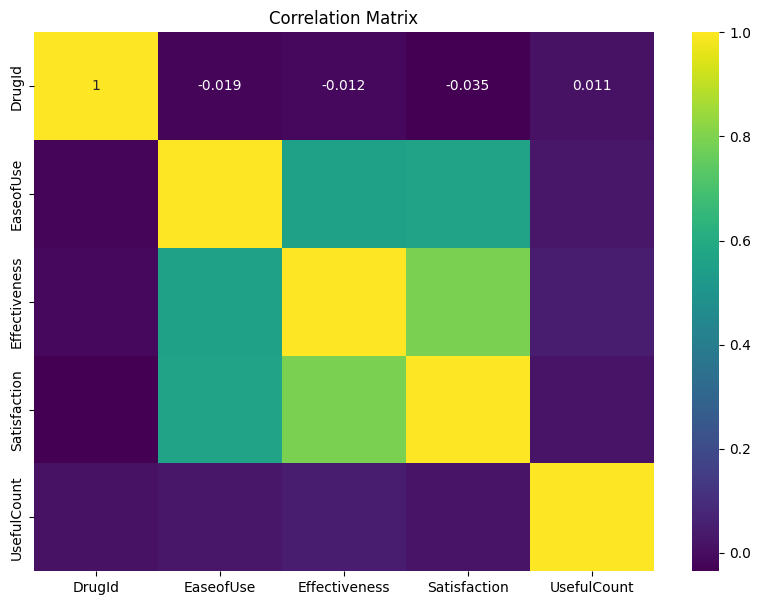

In [30]:
numeric_cols = data.select_dtypes(include=[np.number])
plt.figure(figsize=(10,7))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

#### Satisfaction vs Effectiveness

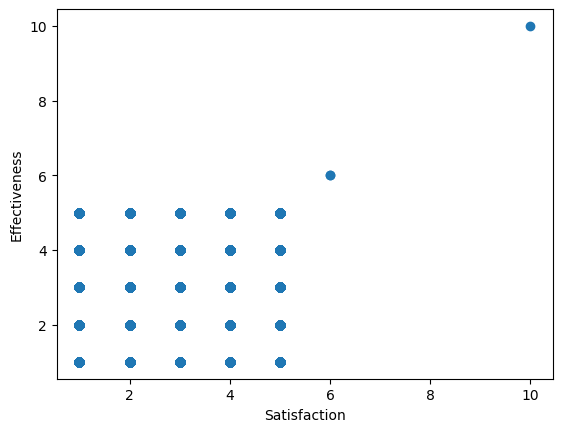

In [31]:
# Create a scatter plot of Satisfaction vs. Effective
plt.scatter(data['Satisfaction'], data['Effectiveness'])
plt.xlabel('Satisfaction')
plt.ylabel('Effectiveness')
plt.show()

From the distribution of the dots, it appears that most of the data points are clustered around the lower left side of the plot, indicating lower satisfaction and effectiveness. This suggests that for most cases in this dataset, as the satisfaction increases, the effectiveness also increases. However, there is one point that stands out in the upper right corner, indicating higher satisfaction and effectiveness. This outlier suggests that there may be at least one instance where both satisfaction and effectiveness are high compared to other observations in this dataset.

### The top 15 recommended drugs for each condition

In [32]:
recommended_drugs = (
    data.sort_values(by=['Condition', 'Effectiveness', 'EaseofUse', 'Satisfaction'], ascending=False)
    .drop_duplicates(subset='Condition', keep='first')
    .set_index('Condition')['Drug']
    .head(15)
)

print("The top 15 recommended drugs for each condition are:\n")
print(recommended_drugs)

The top 15 recommended drugs for each condition are:

Condition
seborrheic dermatitis of scalp                                     ciclopirox suspension, topical
renal cell carcinoma adjuvant therapy following nephrectomy                                sutent
refractory lung disease due to MAC                                    arikayce vial for nebulizer
raised seborrheic keratosis                                       eskata solution with applicator
primary progressive multiple sclerosis                                               ocrevus vial
pemphigus vulgaris                                                                   rituxan vial
osteoporosis in postmenopausal woman at high risk for fracture           reclast bottle, infusion
non-metastatic castration-resistant prostate cancer                                erleada tablet
neurotrophic keratitis                                                             oxervate drops
malignant tumor or cancer                             

## Useful Count 

UsefulCount
3.0      574
5.0      534
4.0      518
6.0      480
2.0      474
7.0      448
1.0      422
8.0      366
9.0      352
0.0      328
10.0     308
11.0     280
12.0     220
13.0     206
14.0     172
15.0     170
16.0     138
18.0      94
17.0      88
19.0      66
21.0      44
20.0      42
22.0      38
23.0      24
25.0      20
24.0      14
26.0      14
33.0       8
29.0       8
27.0       6
30.0       6
35.0       4
31.0       4
58.0       4
34.0       4
28.0       4
54.0       4
63.0       2
140.0      2
39.0       2
88.0       2
46.0       2
100.0      2
56.0       2
66.0       2
83.0       2
38.0       2
44.0       2
113.0      2
70.0       2
32.0       2
40.0       2
52.0       2
62.0       2
36.0       2
37.0       2
45.0       2
Name: count, dtype: int64
Skewness:  5.09650737167029


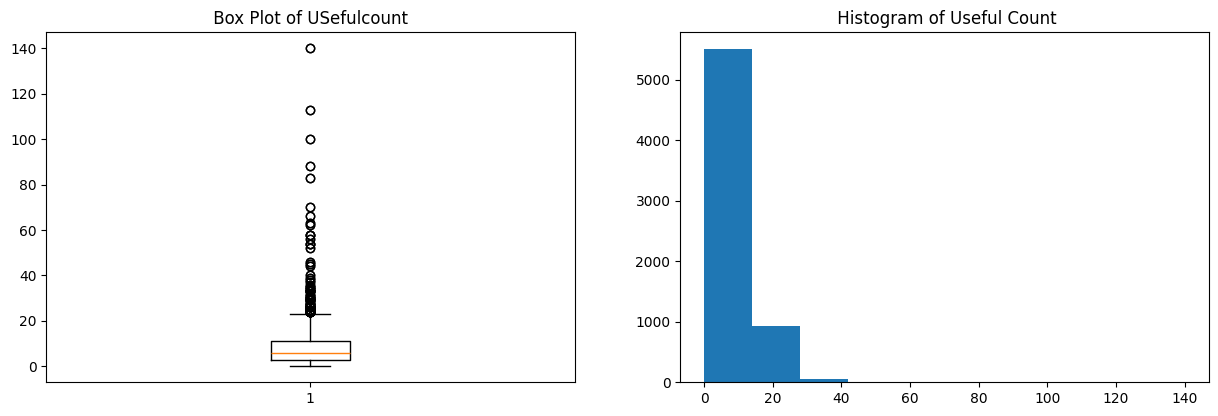

In [33]:
Useful_counts = data2['UsefulCount'].value_counts()
print(Useful_counts)

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.boxplot(data2["UsefulCount"])
plt.title(" Box Plot of USefulcount ")

plt.subplot(2,2,2)
plt.hist(data2["UsefulCount"])
plt.title(" Histogram of Useful Count")
print("Skewness: ", data2.UsefulCount.skew())

The ‘UsefulCount’ data is heavily skewed towards lower values, with a few outliers that have significantly higher counts. This could suggest that whatever is being measured by ‘UsefulCount’ typically has low counts in most cases, but there can be instances where the count is much higher.

Skewness:  0.1353991702328862


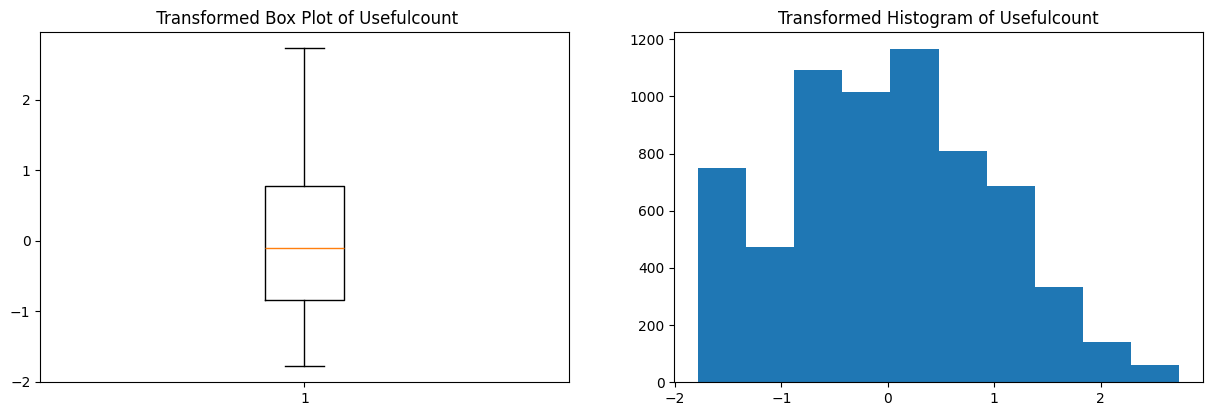

In [34]:
data_Usefulcount = pd.DataFrame(data2['UsefulCount'])

scaler = MinMaxScaler(feature_range=(1, 2))
power = PowerTransformer(method='box-cox')
pipeline = Pipeline(steps=[('s', scaler),('p', power)])
data_Usefulcount1 = pipeline.fit_transform(data_Usefulcount)

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.boxplot(data_Usefulcount1)
plt.title(" Transformed Box Plot of Usefulcount")

plt.subplot(2,2,2)
plt.hist(data_Usefulcount1)
plt.title("Transformed Histogram of Usefulcount")

data2['UsefulCount_boxcox'] = data_Usefulcount1
print("Skewness: ", data2['UsefulCount_boxcox'].skew())

The ‘UsefulCount’ data, after a logarithmic transformation, appears to have a relatively symmetrical and unimodal distribution with a slight right skew and lighter tails. This could suggest that the logarithmically transformed ‘UsefulCount’ typically has a central tendency, with fewer instances of extremely high or low counts.

## EaseofUse

Text(0, 0.5, 'Density')

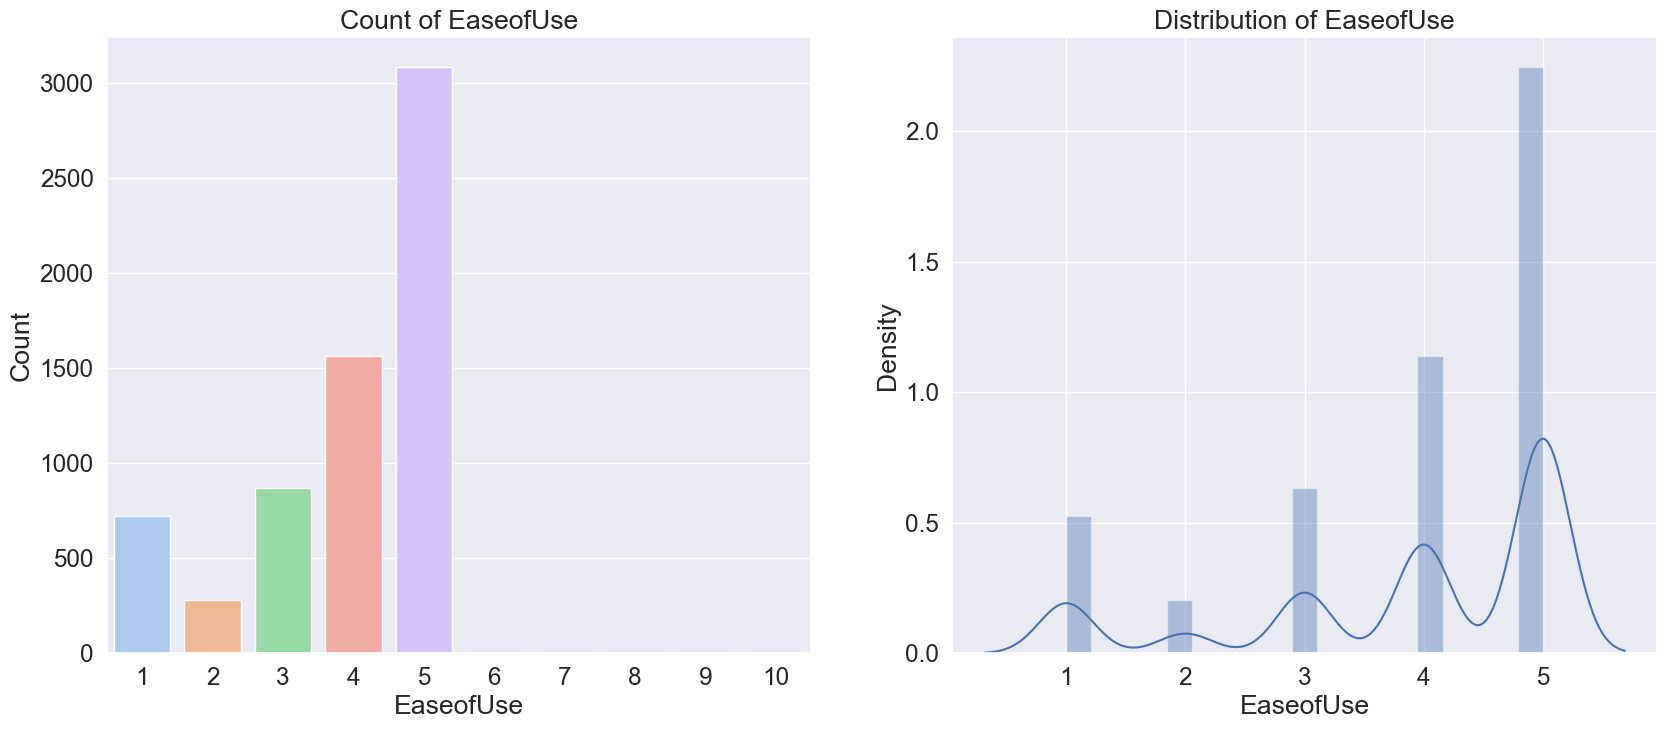

In [35]:
    # Set style and font scale
    sns.set(font_scale = 1.6, style = 'darkgrid')

    # Create subplots with specific figure size
    fig, ax = plt.subplots(1, 2, figsize=(20, 8))

    # Create count plot
    count_plot = sns.countplot(x='EaseofUse', data=data2, palette='pastel', order=list(range(1, 11)), ax=ax[0])
    count_plot.set_title('Count of EaseofUse')
    count_plot.set_xlabel("EaseofUse")
    count_plot.set_ylabel("Count")

    # Create distribution plot
    dist_plot = sns.distplot(data2['EaseofUse'], ax=ax[1])
    dist_plot.set_title('Distribution of EaseofUse')
    dist_plot.set_xlabel("EaseofUse")
    dist_plot.set_ylabel("Density")

EaseofUse
5.0    3088
4.0    1564
3.0     872
1.0     720
2.0     282
Name: count, dtype: int64
Skewness:  -1.0956719032464681
Kurtosis:  0.002447716442276704


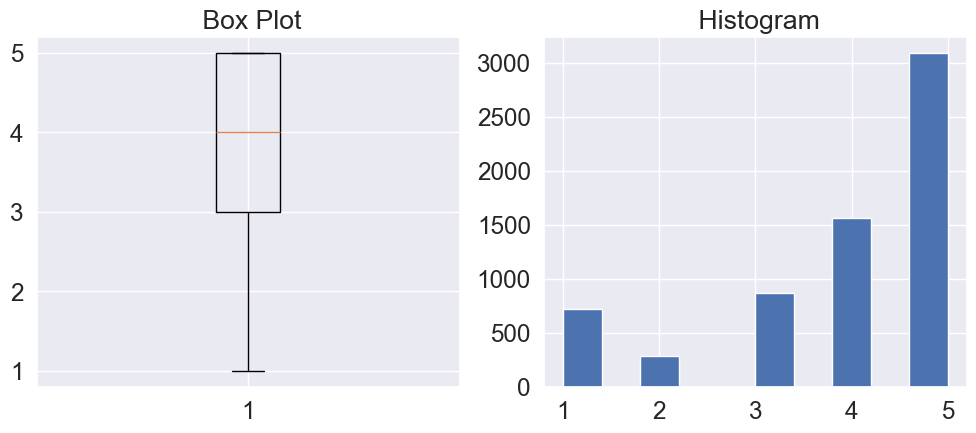

In [36]:
from scipy.stats import kurtosis

# Count the values of 'EaseofUse'
Ease_of_use_counts = data2['EaseofUse'].value_counts()
print(Ease_of_use_counts)

plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
plt.boxplot(data2["EaseofUse"])
plt.title(" Box Plot")

plt.subplot(2,2,2)
plt.hist(data2["EaseofUse"])
plt.title(" Histogram")

# Print skewness and kurtosis
print("Skewness: ", data2.EaseofUse.skew())
print("Kurtosis: ", kurtosis(data2.EaseofUse))

The ‘EaseofUse’ data suggests that most users found the item being rated to be easy to use. However, there are also a significant number of users who gave lower ratings. This could suggest that while the item is generally considered easy to use, there may be some aspects that could be improved to increase user satisfaction

Skewness:  -0.469529733469922


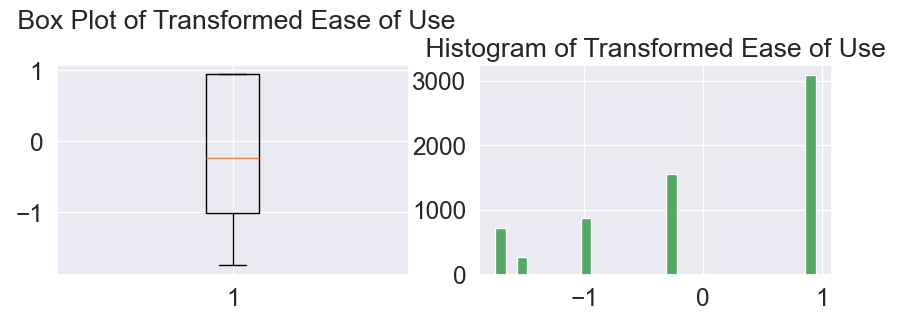

In [37]:
scaler = MinMaxScaler(feature_range=(1, 2))
power = PowerTransformer(method='box-cox')
pipeline = Pipeline(steps=[('s', scaler),('p', power)])

data_EaseofUse = pd.DataFrame(data2['EaseofUse'])
data_EaseofUse1 = pipeline.fit_transform(data_EaseofUse)

plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
plt.boxplot(data_EaseofUse1)
plt.title(" Box Plot of Transformed Ease of Use\n ")

plt.subplot(2,2,2)
plt.hist(data_EaseofUse1, bins=30, color='g')
plt.title(" Histogram of Transformed Ease of Use ")

data2['EaseofUse_boxcox'] = data_EaseofUse1
print("Skewness: ", data2.EaseofUse_boxcox.skew())

The transformation appears to have made the distribution of the data more symmetrical, as indicated by the histogram of the transformed data. The Box-Cox transformation is a power transformation technique used to stabilize variance and make a dataset look more like a normal distribution.

## Satisfaction column

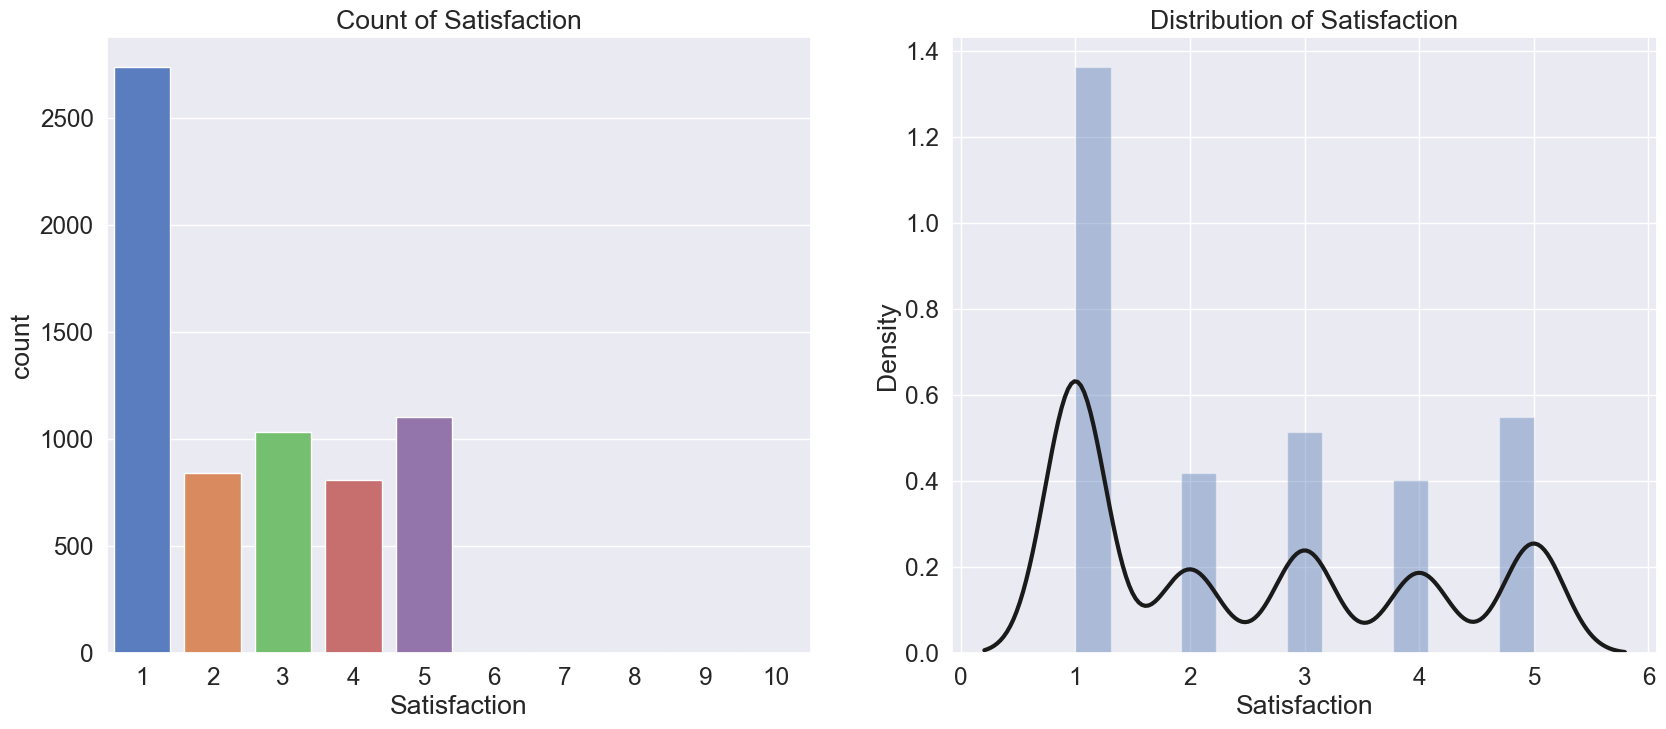

In [38]:
# Set figure size and style
plt.rcParams['figure.figsize'] = [20, 8]
sns.set(font_scale=1.6, style='darkgrid')

# Create subplots
fig, ax = plt.subplots(1, 2)

# Create count plot
count_plot = sns.countplot(x='Satisfaction', data=data2, palette='muted', order=list(range(1, 11)), ax=ax[0])
count_plot.set_title('Count of Satisfaction')
count_plot.set_xlabel("Satisfaction")

# Create distribution plot
dist_plot = sns.distplot(data2['Satisfaction'], ax=ax[1], kde_kws={"color": "k", "lw": 3, "label": "KDE"})
dist_plot.set_title('Distribution of Satisfaction')
dist_plot.set_xlabel("Satisfaction")

plt.show()

Satisfaction
1.0    2738
5.0    1104
3.0    1034
2.0     842
4.0     808
Name: count, dtype: int64
Skewness:  0.46899147382396195


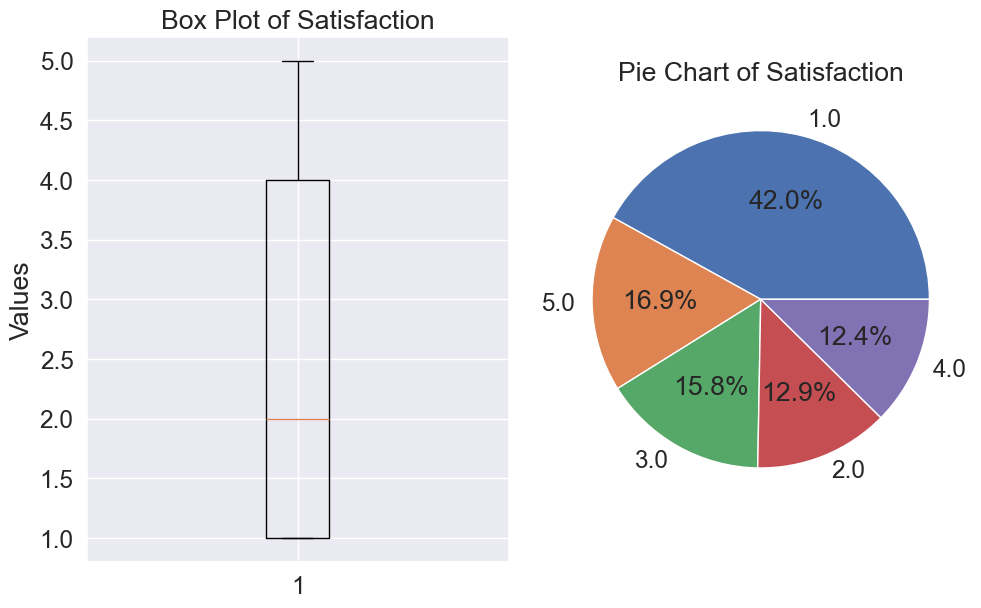

In [39]:
# Count the values of 'Satisfaction'
Satisfaction = data2['Satisfaction'].value_counts()
print(Satisfaction)

# Create figure with specific size
plt.figure(figsize=(10,12))

# Create box plot
plt.subplot(2,2,1)
plt.boxplot(data2["Satisfaction"])
plt.title("Box Plot of Satisfaction")
plt.ylabel("Values")

# Create pie chart
plt.subplot(2,2,2)
plt.pie(Satisfaction, labels = Satisfaction.index, autopct='%1.1f%%')
plt.title("Pie Chart of Satisfaction")

# Calculate and print skewness
print("Skewness: ", data2.Satisfaction.skew())

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

The data suggests that while the majority of users are satisfied (rating of ‘5’), there is a significant number of users who are not satisfied (rating of ‘1’). The ratings are moderately skewed to the right, indicating that there are more low ratings than high ratings. Both the histogram and pie chart reveal a polarized user experience. While a significant number of users are very satisfied, there is also a substantial proportion of users who are not satisfied. This suggests that while some aspects of the product or service are well-received, there may be other areas that need improvement.

## Effectiveness

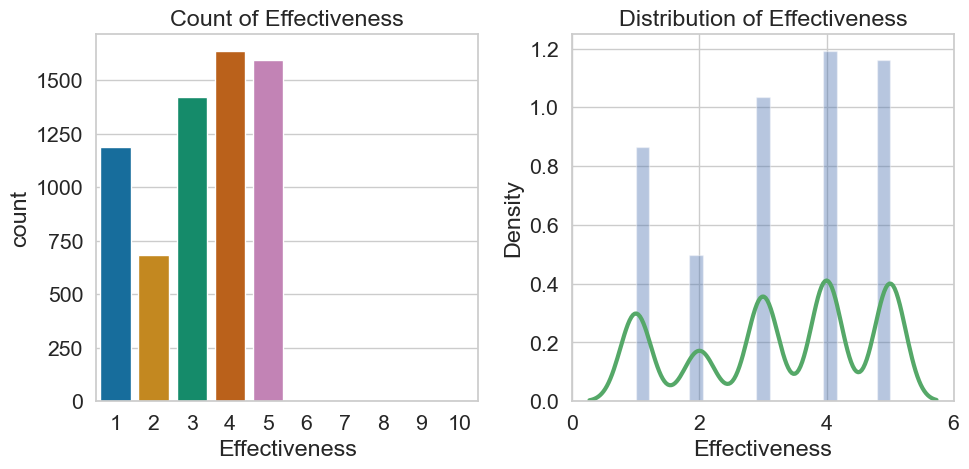

In [40]:
# A countplot of the ratings so we can see the distribution of the ratings
plt.rcParams['figure.figsize'] = [10, 5]
sns.set(font_scale=1.4, style='whitegrid')

fig, ax = plt.subplots(1, 2)

countplt = sns.countplot(x='Effectiveness', data=data2, palette='colorblind', order=list(range(1, 11)), ax=ax[0])
distplt = sns.distplot(data2['Effectiveness'], ax=ax[1], kde_kws={"color": "g", "lw": 3, "label": "KDE"})

countplt.set_title('Count of Effectiveness')
countplt.set_xlabel("Effectiveness")

distplt.set_title('Distribution of Effectiveness')
distplt.set_xlabel("Effectiveness")

plt.tight_layout()

Effectiveness
4.0    1636
5.0    1596
3.0    1420
1.0    1190
2.0     684
Name: count, dtype: int64
Skewness:  -0.35269982353771245


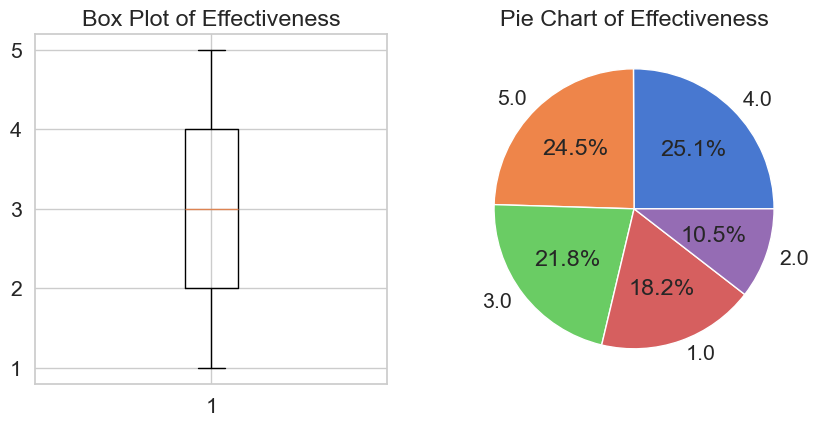

In [41]:
Effectiveness = data2['Effectiveness'].value_counts()
print(Effectiveness)

plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.boxplot(data2["Effectiveness"])
plt.title("Box Plot of Effectiveness")

# Generate a color palette for Piechart
colors = sns.color_palette('muted')[0:len(Effectiveness)]

plt.subplot(2,2,2)
plt.pie(Effectiveness, labels = Effectiveness.index, autopct='%1.1f%%', colors=colors)
plt.title("Pie Chart of Effectiveness")

print("Skewness: ", data2.Effectiveness.skew())

plt.show()

The ‘Effectiveness’ data suggests a diverse range of effectiveness among the items in the dataset. Most items have moderate effectiveness, but there are also items with high and low effectiveness. The data is slightly skewed to the left, indicating that items with lower effectiveness are less frequent than those with higher effectiveness.

### After checking the skewness and outliers, Usefulcount, easeofuse, effectiveness and satisfaction column has been processed

# New Feature creation: Sideeffect

In [42]:
mapping = {1: 5, 2: 4, 3: 3, 4: 2, 5: 1}
data2['Sideeffect'] = data2['Satisfaction'].map(mapping)
# data2.loc[data2['Satisfaction'] == 1, 'Sideeffect'] = data2.loc[data2['Satisfaction'] == 1,5, 'Sideeffect']

In [43]:
data2.columns

Index(['Name', 'Race', 'Age', 'Condition', 'Date', 'Drug', 'DrugId',
       'EaseofUse', 'Effectiveness', 'Reviews', 'Satisfaction', 'Gender',
       'Sides', 'UsefulCount', 'Year', 'Month', 'day_of_week',
       'UsefulCount_boxcox', 'EaseofUse_boxcox', 'Sideeffect'],
      dtype='object')

In [44]:
data2.head()

Name      Race         Age            Condition        Date   
9203     Han     White  75 or over  High Blood Pressure  02-08-2020  \
9209   Allen  Hispanic       55-64  High Blood Pressure   1/14/2020   
9215  Marlon     White       65-74  High Blood Pressure  10/17/2019   
9221   Percy     White       55-64  High Blood Pressure  10/13/2019   
9227     Ute  Hispanic       55-64  High Blood Pressure   8/16/2019   

                     Drug  DrugId  EaseofUse  Effectiveness   
9203  lisinopril solution  6873.0        5.0            4.0  \
9209  lisinopril solution  6873.0        4.0            5.0   
9215  lisinopril solution  6873.0        5.0            5.0   
9221  lisinopril solution  6873.0        2.0            4.0   
9227  lisinopril solution  6873.0        3.0            1.0   

                                                Reviews  Satisfaction  Gender   
9203  I have developed a very itch rash on my body f...           4.0  Female  \
9209  tried alternative medicine Beet root, hibiscus...           4.0    Male   
9215  Have been taking 10 mg doses per day for over ...           5.0    Male   
9221  I don't like that I'm taking this and not know...           2.0    Male   
9227  Was on this medicine for about 2 months and ha...           1.0  Female   

                                                  Sides  UsefulCount    Year   
9203  Dizziness ,  lightheadedness , tiredness, or  ...          3.0  2020.0  \
9209  Dizziness ,  lightheadedness , tiredness, or  ...          3.0     NaN   
9215  Dizziness ,  lightheadedness , tiredness, or  ...          6.0     NaN   
9221  Dizziness ,  lightheadedness , tiredness, or  ...         12.0     NaN   
9227  Dizziness ,  lightheadedness , tiredness, or  ...         22.0     NaN   

      Month day_of_week  UsefulCount_boxcox  EaseofUse_boxcox  Sideeffect  
9203    2.0    Saturday           -0.835439          0.943255           2  
9209    NaN         NaN           -0.835439         -0.231105           2  
9215    NaN         NaN           -0.102133          0.943255           1  
9221    NaN         NaN            0.918562         -1.480793           4  
9227    NaN         NaN            1.837785         -1.004962           5

In [45]:
data2['Sideeffect'].value_counts()

Sideeffect
5    2738
1    1104
3    1034
4     842
2     808
Name: count, dtype: int64

In [46]:
# Mapping side effects
data2['Sideeffect'] = data2['Sideeffect'].map({
    1: 'No side effects',
    2: 'Mild',
    3: 'Moderate',
    4: 'Extreme',
    5: 'Extremely Severe'
})

In [47]:
data2

Name      Race         Age                     Condition   
9203        Han     White  75 or over           High Blood Pressure  \
9209      Allen  Hispanic       55-64           High Blood Pressure   
9215     Marlon     White       65-74           High Blood Pressure   
9221      Percy     White       55-64           High Blood Pressure   
9227        Ute  Hispanic       55-64           High Blood Pressure   
...         ...       ...         ...                           ...   
18981   Danyell     Asian       25-34  Kidney Disease from Diabetes   
18982   Antione     Asian       45-54           High Blood Pressure   
18984  Laurence     White       45-54           High Blood Pressure   
18985   Jackson     Asian       25-34           High Blood Pressure   
18990     Elisa     Asian       65-74                         Other   

             Date                 Drug  DrugId  EaseofUse  Effectiveness   
9203   02-08-2020  lisinopril solution  6873.0        5.0            4.0  \
9209    1/14/2020  lisinopril solution  6873.0        4.0            5.0   
9215   10/17/2019  lisinopril solution  6873.0        5.0            5.0   
9221   10/13/2019  lisinopril solution  6873.0        2.0            4.0   
9227    8/16/2019  lisinopril solution  6873.0        3.0            1.0   
...           ...                  ...     ...        ...            ...   
18981  05-11-2008           lisinopril  6873.0        2.0            1.0   
18982  05-10-2008           lisinopril  6873.0        5.0            1.0   
18984  05-09-2008           lisinopril  6873.0        5.0            5.0   
18985  05-09-2008           lisinopril  6873.0        1.0            1.0   
18990  05-05-2008           lisinopril  6873.0        1.0            1.0   

                                                 Reviews  Satisfaction   
9203   I have developed a very itch rash on my body f...           4.0  \
9209   tried alternative medicine Beet root, hibiscus...           4.0   
9215   Have been taking 10 mg doses per day for over ...           5.0   
9221   I don't like that I'm taking this and not know...           2.0   
9227   Was on this medicine for about 2 months and ha...           1.0   
...                                                  ...           ...   
18981  I was prescribed this medication to prevent ki...           1.0   
18982  I am a 51 year old male with type II diabetes....           1.0   
18984  Am losing wweight due to diuretic added I thin...           4.0   
18985  I took one 10mg pill and about 4 hours later t...           1.0   
18990  I have been taking this for 60 days now 2.5mg ...           1.0   

       Gender                                              Sides  UsefulCount   
9203   Female  Dizziness ,  lightheadedness , tiredness, or  ...          3.0  \
9209     Male  Dizziness ,  lightheadedness , tiredness, or  ...          3.0   
9215     Male  Dizziness ,  lightheadedness , tiredness, or  ...          6.0   
9221     Male  Dizziness ,  lightheadedness , tiredness, or  ...         12.0   
9227   Female  Dizziness ,  lightheadedness , tiredness, or  ...         22.0   
...       ...                                                ...          ...   
18981  Female  Dizziness ,  lightheadedness , tiredness, or  ...         18.0   
18982    Male  Dizziness ,  lightheadedness , tiredness, or  ...         12.0   
18984  Female  Dizziness ,  lightheadedness , tiredness, or  ...          3.0   
18985  Female  Dizziness ,  lightheadedness , tiredness, or  ...         10.0   
18990  Female  Dizziness ,  lightheadedness , tiredness, or  ...         24.0   

         Year  Month day_of_week  UsefulCount_boxcox  EaseofUse_boxcox   
9203   2020.0    2.0    Saturday           -0.835439          0.943255  \
9209      NaN    NaN         NaN           -0.835439         -0.231105   
9215      NaN    NaN         NaN           -0.102133          0.943255   
9221      NaN    NaN         NaN            0.918562         -1.480793   
9227      NaN

# Exploratory Data Analysis

## Most commonly used Drugs based on No. of Users

Drug
cymbalta                                               4648
lisinopril                                             4269
lisinopril solution                                    4269
lexapro                                                4134
hydrocodone-acetaminophen                              3944
effexor xr                                             3486
lyrica                                                 3069
tramadol hcl er                                        2932
tramadol hcl                                           2932
zoloft                                                 2662
prednisone tablet, delayed release (enteric coated)    2576
prednisone concentrate                                 2576
prednisone                                             2576
seroquel                                               2446
phentermine hcl                                        2367
celexa                                                 2224
topamax                            

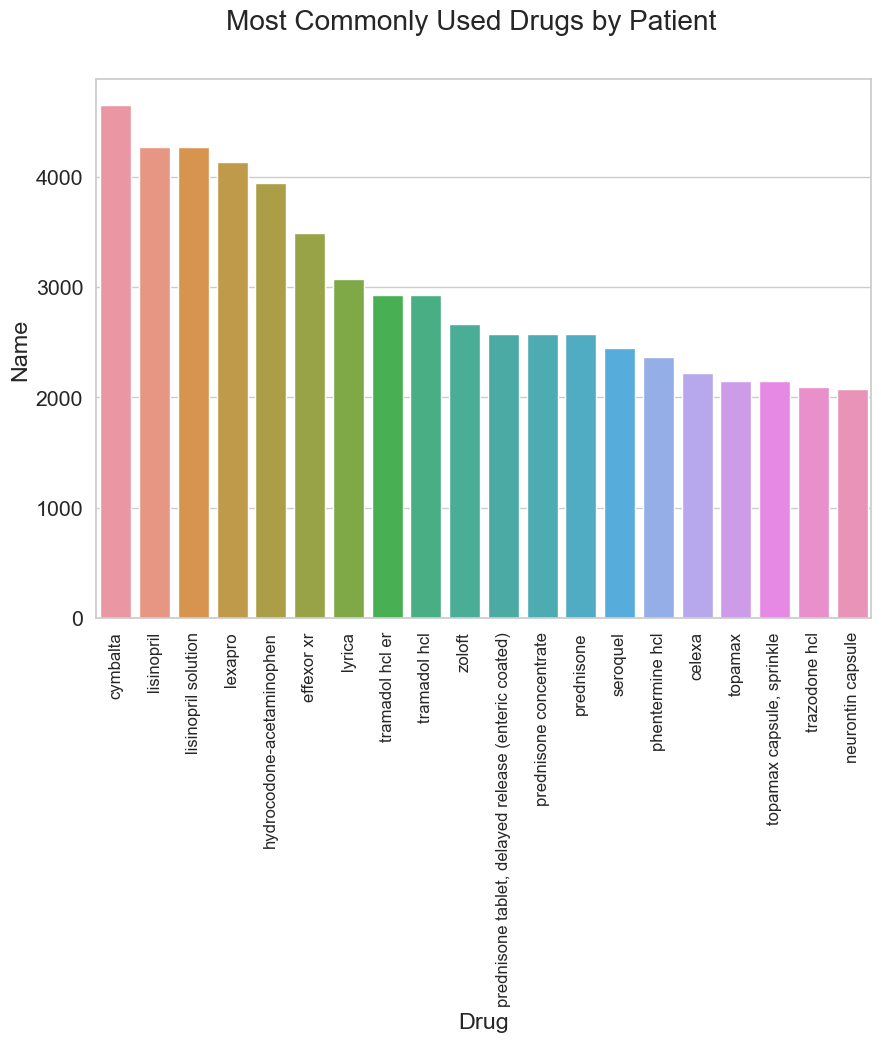

In [48]:
drug = data['Drug'].value_counts().head(20)
print(drug)

data_= data['Drug'].value_counts().head(20).reset_index()
data_.columns = ['Drug', 'Name']
plt.figure(figsize=(10,7))

sns.barplot(data=data_, x = 'Drug', y = 'Name')
plt.suptitle("Most Commonly Used Drugs by Patient")
plt.xticks(rotation=90,fontsize=12)
plt.show()

#### Cymbalta tops the list followed by Lisinopril. It is to be noted that all the 20 drugs has been used by more than atleast 2000 people

### Top 10 drugs which are used for the pain condition.

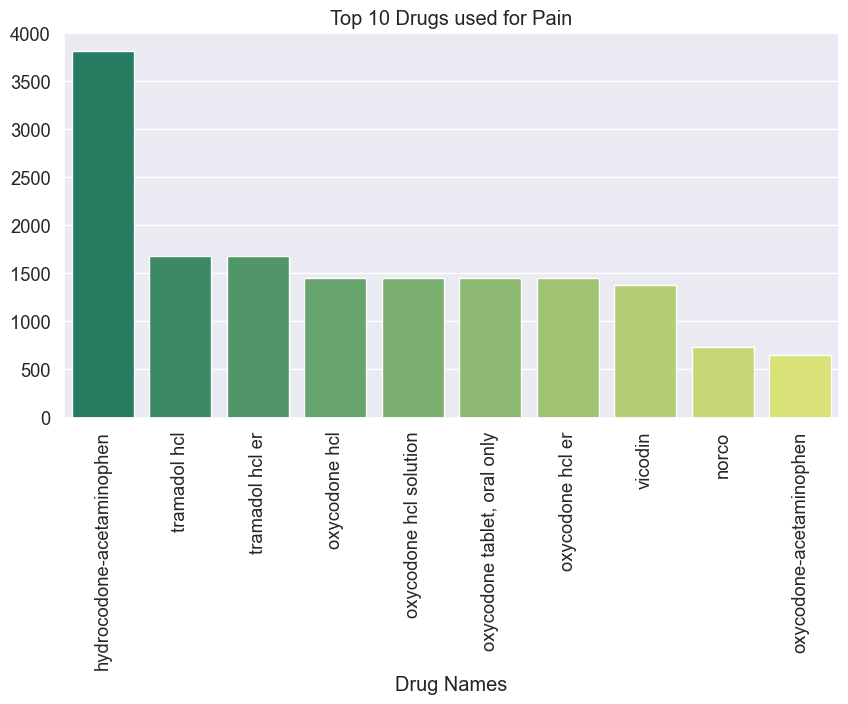

In [49]:
df2 = data[data['Condition'] == 'Pain']['Drug'].value_counts()[0: 10]
sns.set(font_scale = 1.2, style = 'darkgrid')

sns_ = sns.barplot(x = df2.index, y = df2.values, palette = 'summer')
sns_.set_xlabel('Drug Names')
sns_.set_title("Top 10 Drugs used for Pain")
plt.setp(sns_.get_xticklabels(), rotation = 90);

## Most Common Conditions in the Patients

Condition
Other                                                  49765
Pain                                                   25232
High Blood Pressure                                    23275
Depression                                             14509
Birth Control                                          12253
                                                       ...  
Diagnostic Test for Myasthenia Gravis                      1
Myelodysplastic Syndrome with 5q Deletion Gene Type        1
Hunter Syndrome                                            1
Increased Uric Acid due to Cancer Chemotherapy             1
Adverse Effect of Benzodiazepine-Based Tranquilizer        1
Name: count, Length: 1806, dtype: int64


Text(0, 0.5, 'Users')

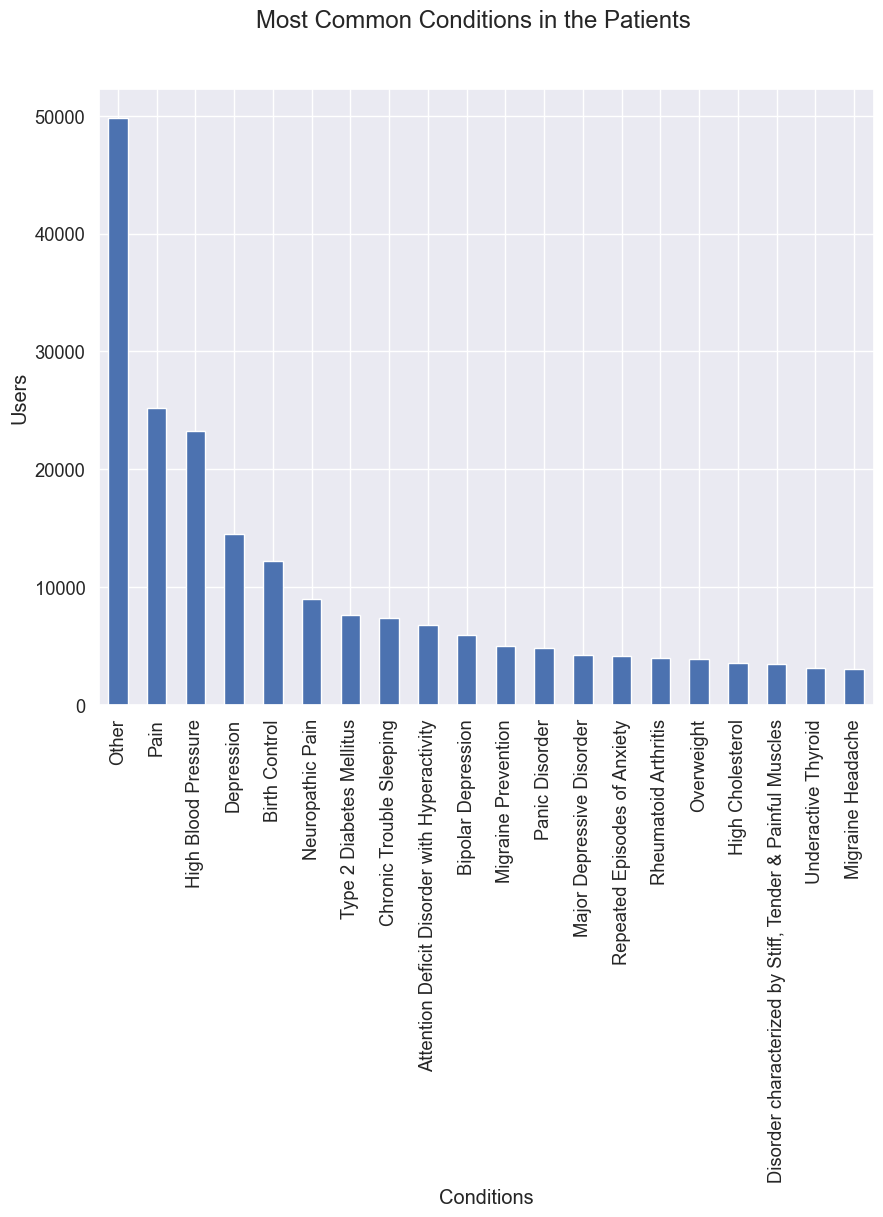

In [50]:
condition = data['Condition'].value_counts()
print(condition)
top_conditions = condition.head(15)

data['Condition'].value_counts().nlargest(20).plot(kind='bar',figsize=(10,8))
plt.suptitle("Most Common Conditions in the Patients")
plt.xlabel('Conditions')
plt.ylabel('Users')

#### As much as 50,000 users have reported other conditions followed by Pain topped the list with more than 25000 people reporting it.

# EDA on Licinopril

In [51]:
fig = px.histogram(data2, x = "Drug", y = "Satisfaction", color="EaseofUse", hover_data = data2.columns,
                   color_discrete_sequence = px.colors.qualitative.Set3,
                   title = "Satisfaction rate and ease of use" )
fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 15))
fig.show()

## Which gender is the predominant user?

Gender
Female    4060
Male      2466
Name: count, dtype: int64


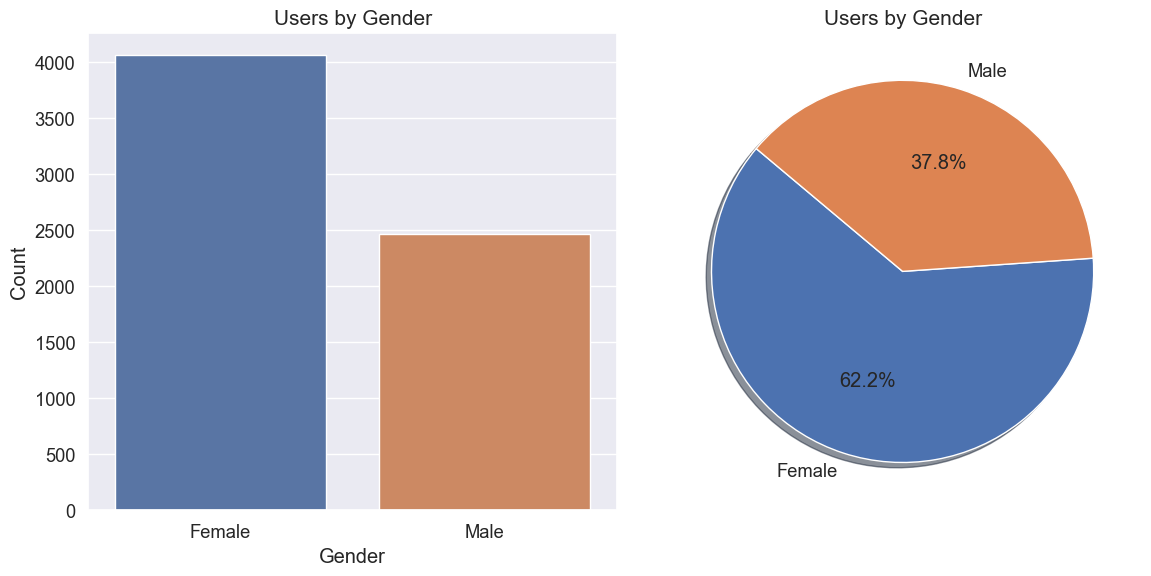

In [52]:
# Count the values of 'Gender'
gender_counts = data2['Gender'].value_counts()
print(gender_counts)

# Create figure with specific size
plt.figure(figsize=(12,6))

# Create count plot
plt.subplot(1,2,1)
sns.countplot(x='Gender', data=data2)
plt.title('Users by Gender', fontsize=15)
plt.xlabel('Gender')
plt.ylabel('Count')

# Create pie chart
plt.subplot(1,2,2)
plt.pie(gender_counts, labels = gender_counts.index, autopct='%1.1f%%', startangle=140, shadow=True)
plt.title('Users by Gender', fontsize=15)

# Show the plot
plt.tight_layout()
plt.show()

### Females are the predominant user

## Which race is the predominant user?

Race
White       2057
Hispanic    1845
Black       1420
Asian       1204
Name: count, dtype: int64


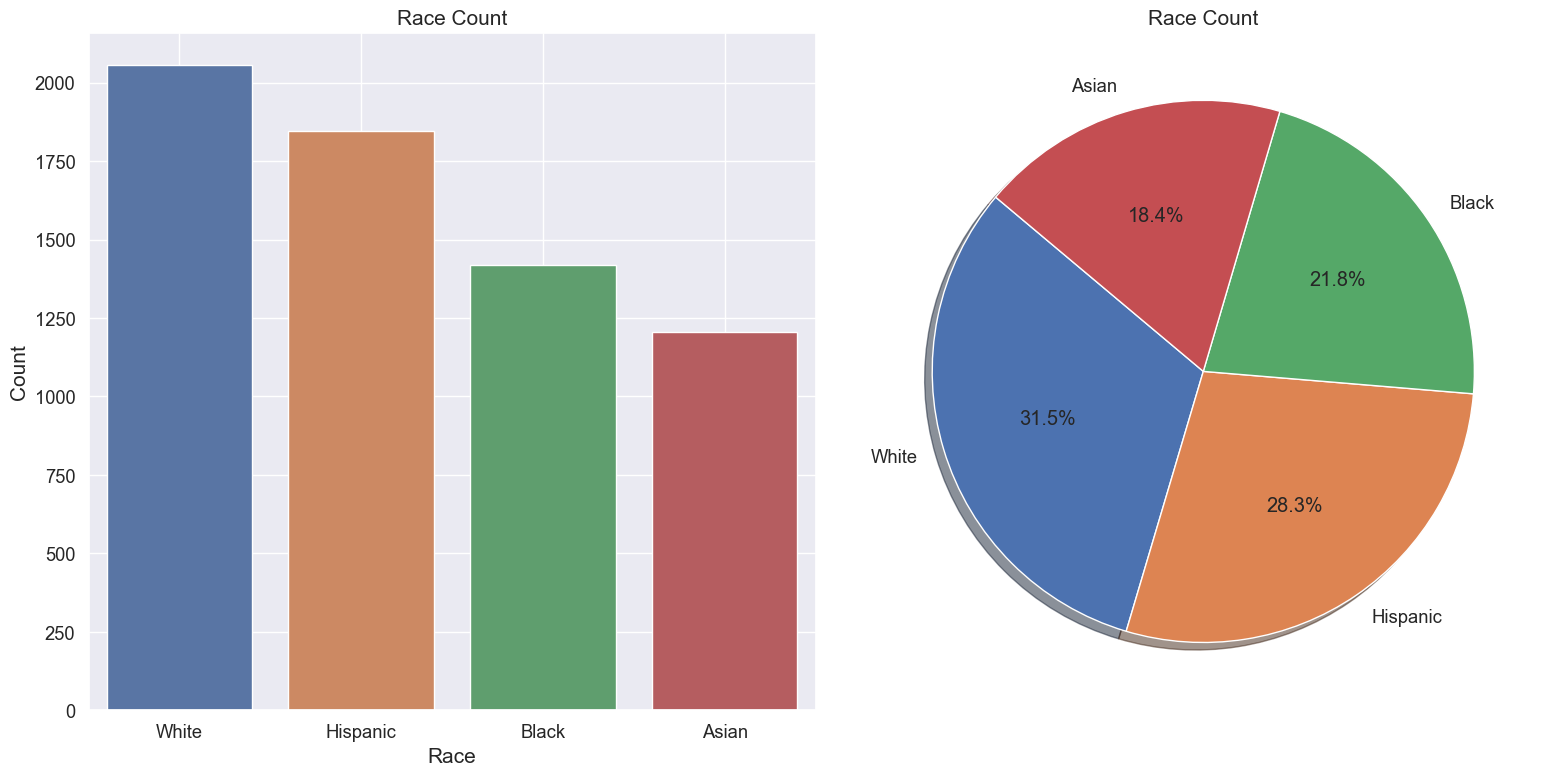

In [53]:
# Count the values of 'Race'
race_counts = data2['Race'].value_counts()
print(race_counts)

# Create figure with specific size
plt.figure(figsize=(16,8))

# Create count plot
plt.subplot(1,2,1)
sns.countplot(x='Race', data=data2)
plt.title('Race Count', fontsize=15)
plt.xlabel('Race', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.grid(True)

# Create pie chart
plt.subplot(1,2,2)
plt.pie(race_counts, labels = race_counts.index, autopct='%1.1f%%', startangle=140, shadow=True)
plt.title('Race Count', fontsize=15)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

### White race people are the most predominant user.

## In each race, which gender is the predominant user?

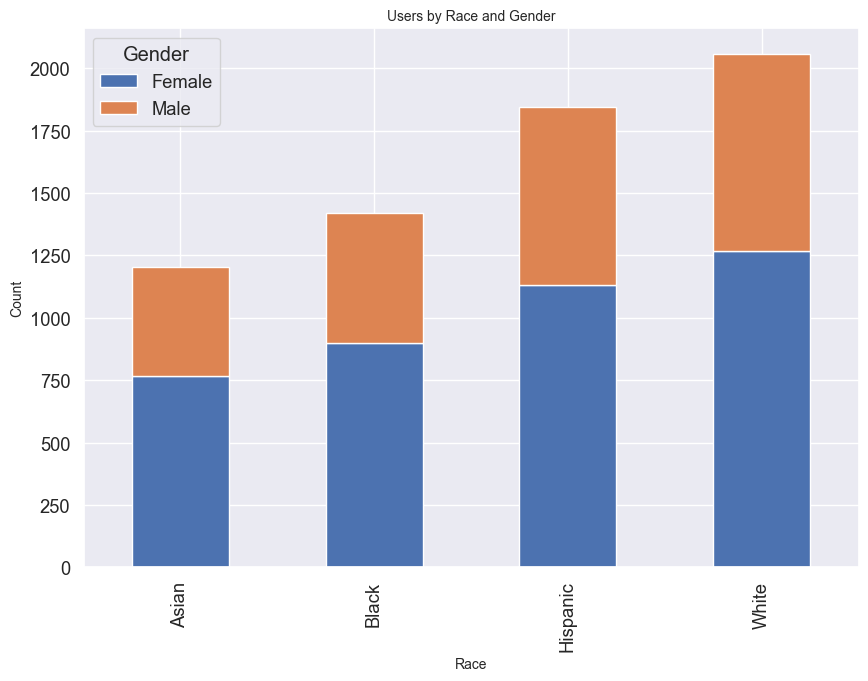

In [54]:
import matplotlib.pyplot as plt

# Create a DataFrame that counts the number of each gender in each race
gender_race_counts = data2.groupby(['Race', 'Gender']).size().unstack()

# Create a stacked bar plot
gender_race_counts.plot(kind='bar', stacked=True, figsize=(10, 7))

plt.title("Users by Race and Gender", fontsize=10)
plt.xlabel('Race', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.show()

The Stacked Bar Plot suggests a higher prevalence of Female users across all races, with the highest user count observed in the ‘White’ category. This could reflect usage patterns or preferences among different demographic groups on a particular platform or within a specific dataset. 

## In each age group, which gender is the predominant user?

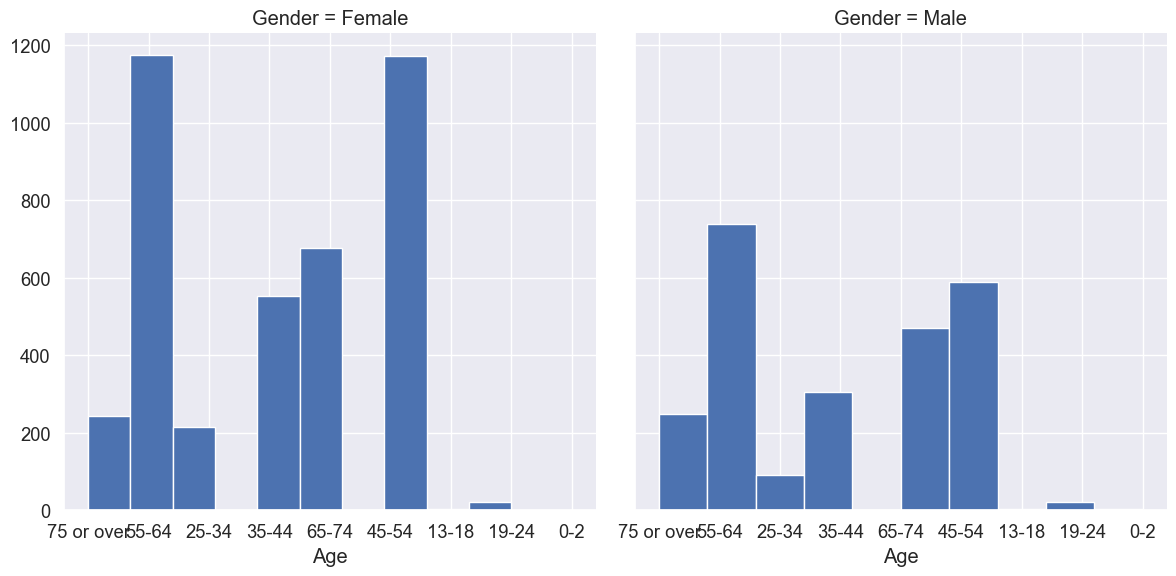

In [55]:
import seaborn as sns

# Create a FacetGrid object
g = sns.FacetGrid(data2, col='Gender', height=6)

# Map a histogram to each subset
g.map(plt.hist, 'Age')

plt.show()

Text(0.5, 1.0, 'Users by Age and Gender')

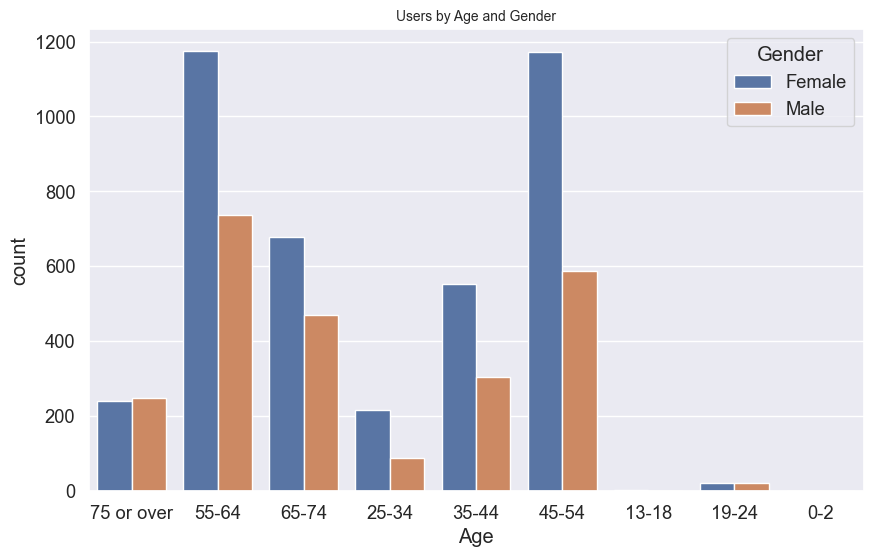

In [56]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Age',hue='Gender',data=data2)
plt.title("Users by Age and Gender", fontsize = 10)

The data suggests a higher prevalence of Female users across all age groups, except for the ‘0-17’ age group where Male users are slightly more prevalent. 

### In each year, how many reviews were collected?

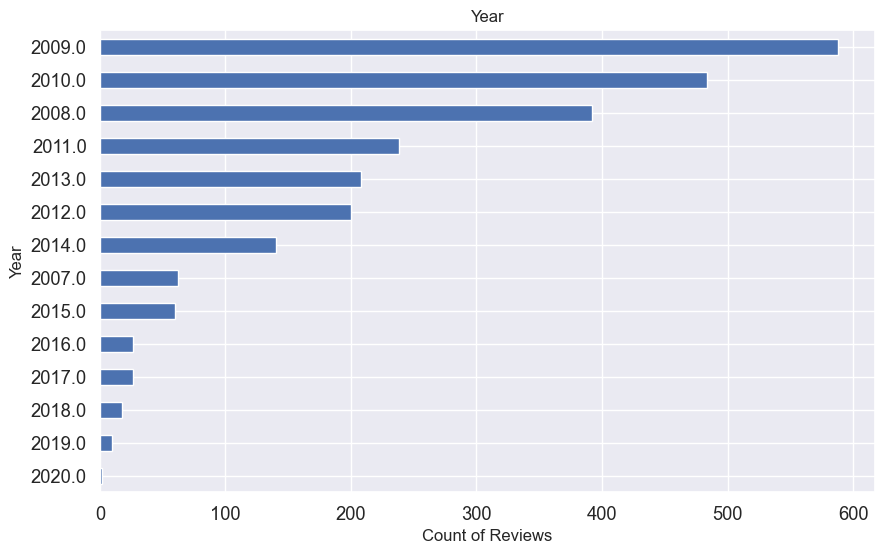

In [57]:
plt.figure(figsize=(10, 6))
data2['Year'].value_counts().sort_values().plot(kind='barh')
plt.title("Year", fontsize = 12)
plt.xlabel("Count of Reviews", fontsize = 12)
plt.ylabel("Year", fontsize = 12)
plt.show()

From the graph, we can observe the following:-

There is an increasing trend in the number of reviews collected over time, peaking in 2014. This suggests that the activity of collecting reviews has been growing over the years.

After 2014, there is a slight decrease in the number of reviews collected in subsequent years. This could indicate a change in the review collection process, user behavior, or other factors.

The years with the most reviews are 2014, followed by 2013 and 2012. The years with the least reviews are 2007 and 2008.

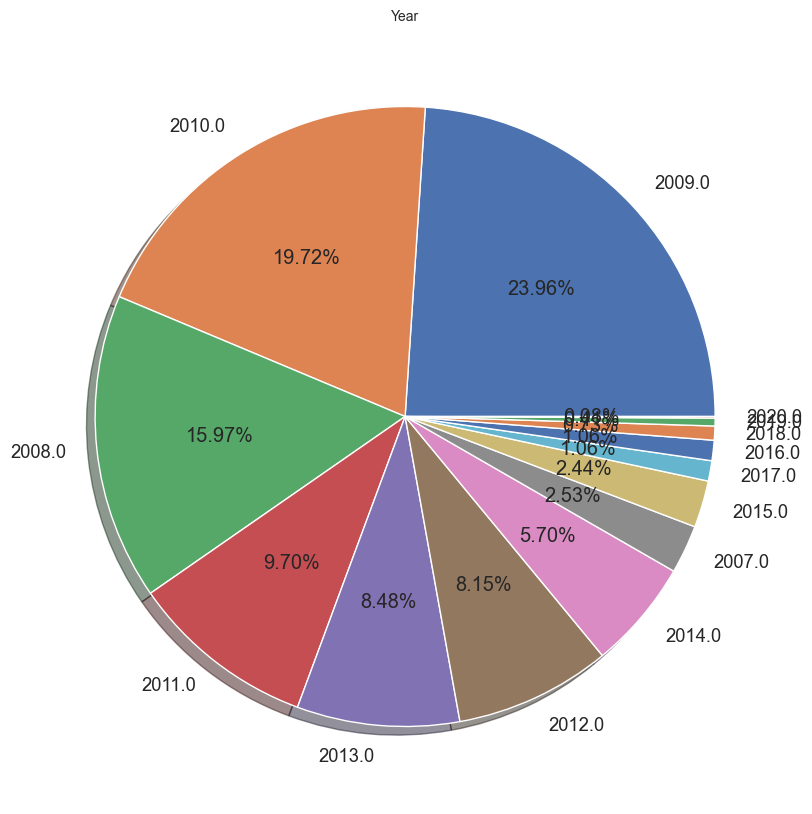

In [58]:
plt.figure(figsize=(10, 15))
data2['Year'].value_counts().plot(kind='pie', autopct='%1.2f%%', shadow=True)
plt.title("Year", fontsize = 10)
plt.ylabel("")  # Hide the y-label as it's not necessary for a pie chart
plt.show()

From the pie chart, we can observe the following:-

The largest segment represents the year 2009, accounting for 24.9% of the total. This suggests that the year 2009 had the highest proportion of whatever metric is being measured in this dataset.

The second largest segment represents the year 2010, accounting for 19.7% of the total.

### In each year, there is a gradual decrease in user reviews

## How effective is the drug?

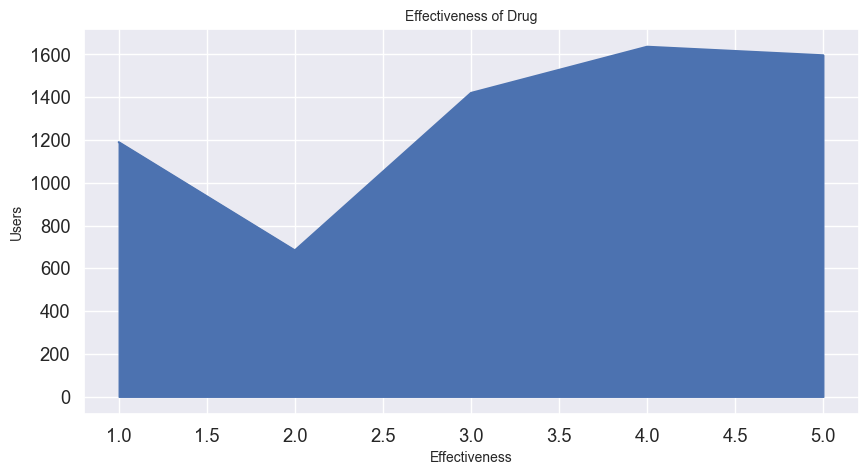

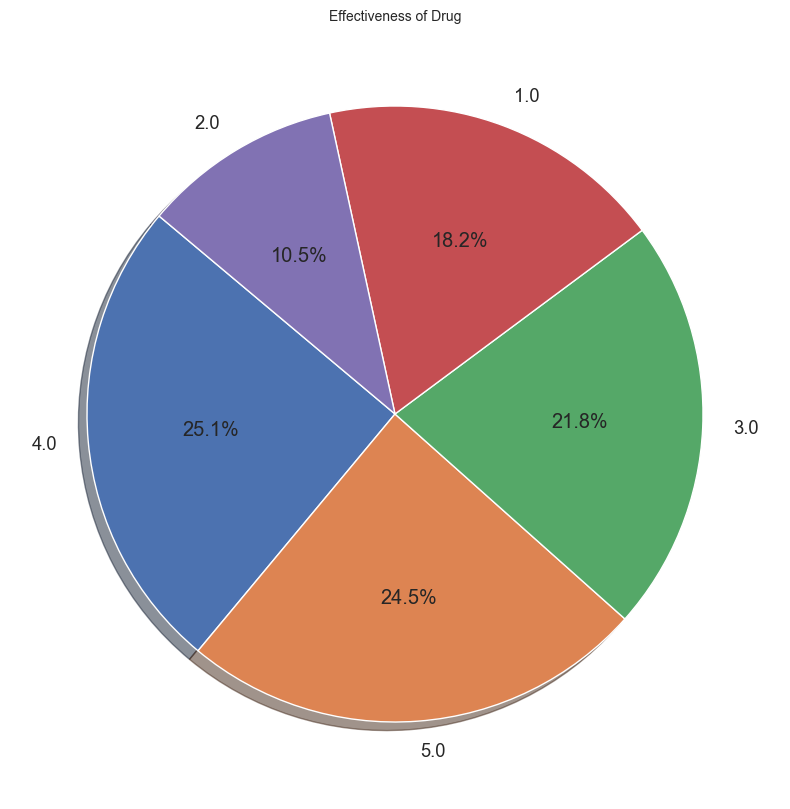

In [59]:
plt.figure(figsize=(10, 5))
data2['Effectiveness'].value_counts().sort_index().plot(kind='area')
plt.title("Effectiveness of Drug", fontsize = 10)
plt.xlabel("Effectiveness", fontsize = 10)
plt.ylabel("Users", fontsize = 10)
plt.grid(True)

plt.figure(figsize=(10, 10))
data2['Effectiveness'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, shadow=True)
plt.title("Effectiveness of Drug", fontsize = 10)
plt.ylabel("")  # Hide the y-label as it's not necessary for a pie chart
plt.show()

### The drug is fairly effective with around 1600(25.1%) users giving 4 rating to it.

### How effective is the drug among both the gender category?

<Figure size 1000x800 with 0 Axes>

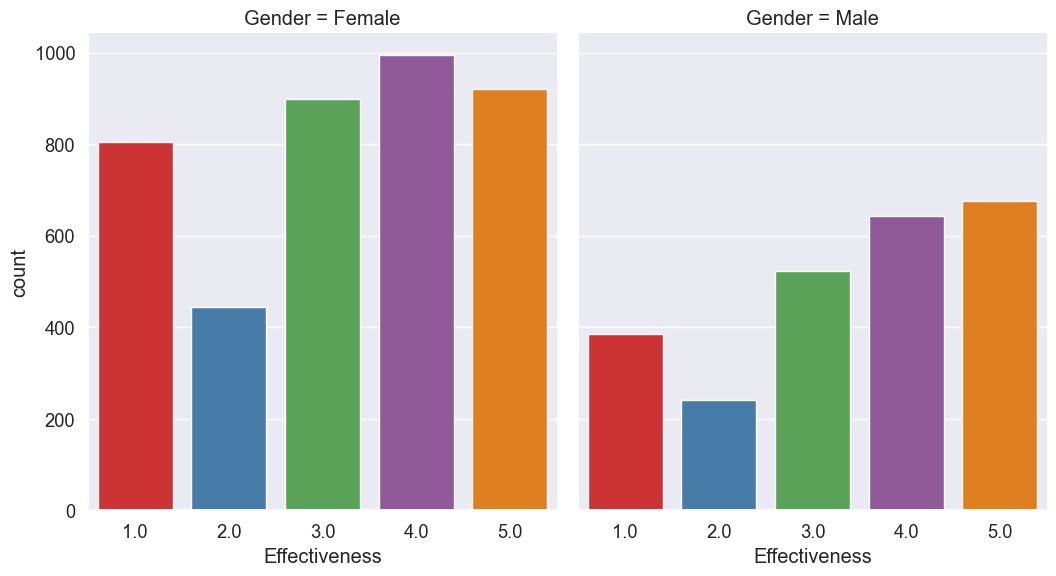

In [60]:
plt.figure(figsize=(10,8))

# Create a FacetGrid object
g = sns.FacetGrid(data2, col="Gender", height=6, aspect=.9)

# Map the data to the plot with color differentiation
g.map(sns.countplot, "Effectiveness", palette='Set1')

From the bar plot, we can observe the following:

For both genders, there are cases across all levels of effectiveness. This suggests that the drug has varying levels of effectiveness among users.

At an effectiveness level of 1.0, there are more cases for Males than Females. This could suggest that the drug is less effective for a larger number of Male users compared to Female users at this level.

At effectiveness levels of 2.0, 3.0, and 5.0, there are more cases for Females than Males. This could suggest that the drug is more effective for a larger number of Female users compared to Male users at these levels.

At an effectiveness level of 4.0, the number of cases is slightly higher for Males than Females.

### Both the users have given a mixed response

## How many users reported side effects for the drug?

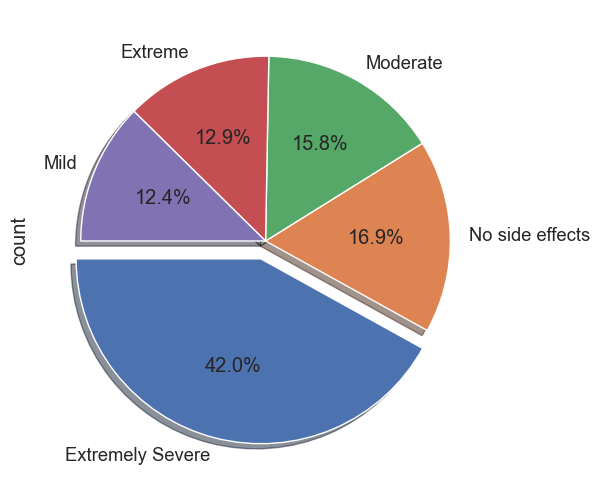

In [61]:
explode = (0.1, 0, 0, 0, 0)  # only "explode" the first slice

plt.figure(figsize=(6,6))
data2['Sideeffect'].value_counts().plot.pie(
    autopct='%1.1f%%', 
    explode = explode,
    startangle=180, 
    shadow=True)
plt.show()

#### 42% users reported extremely severe sideeffects with 1 being no side effect and 5 being extremely severe side effect

### Which age group has reported most side effect?

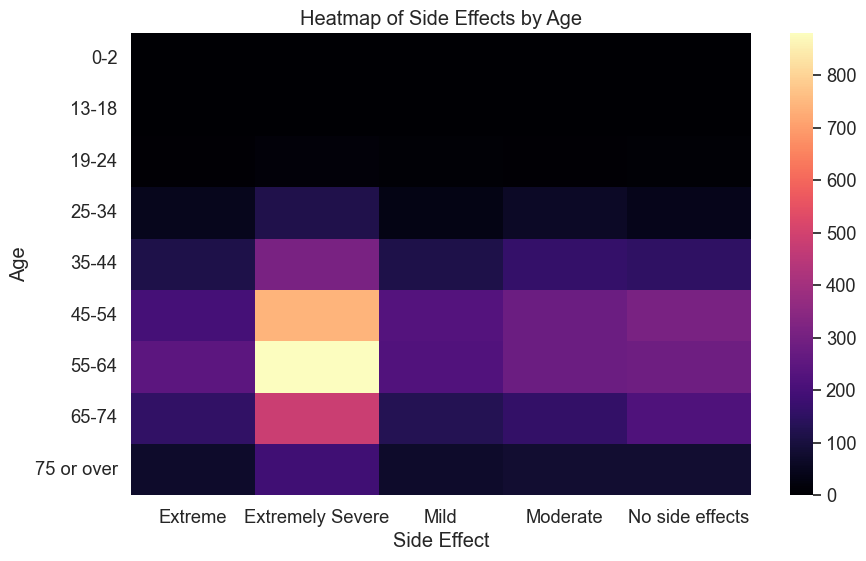

In [62]:
# Create a crosstab of 'Age' and 'Sideeffect'
ct = pd.crosstab(data2['Age'], data2['Sideeffect'])

# Plot the heatmap
plt.figure(figsize=(10,6))
sns.heatmap(ct, cmap='magma')
plt.title('Heatmap of Side Effects by Age')
plt.xlabel('Side Effect')
plt.ylabel('Age')
plt.show()

The age group 60+ has reported the most side effects, as indicated by the presence of yellow in their row. This suggests that individuals in the 60+ age group experience more side effects than other age groups.

This could indicate that the drug or treatment being studied has different effects on different age groups, or that older individuals are more likely to report side effects. 

<Axes: xlabel='Age', ylabel='count'>

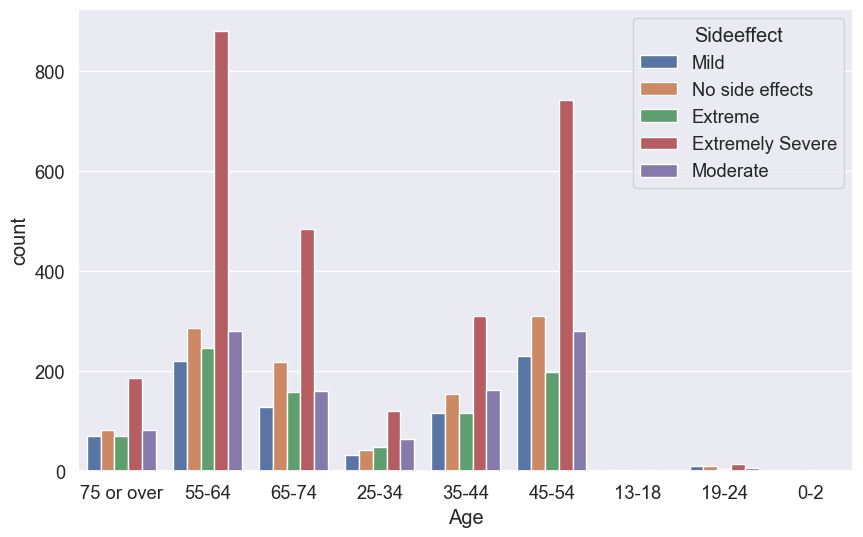

In [63]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Age',hue='Sideeffect',data=data2)

#### 55-64 age group has opinionated that they had extreme side effects

### Among both the gender category, how is the sideeffects of the drug?

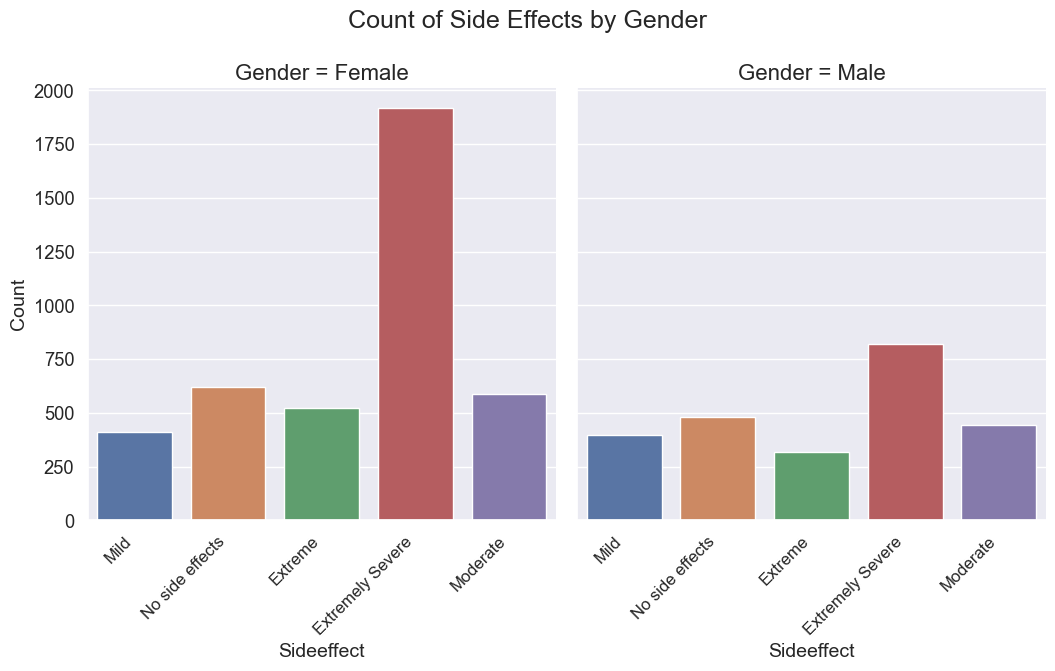

In [64]:
# Set up the figure and create the catplot
g = sns.catplot(
    x="Sideeffect", 
    col="Gender", 
    data=data2, 
    kind="count", 
    height=6, 
    aspect=.9,
)

# Customize the plot
(g.set_xticklabels(rotation=45, ha='right', fontsize=12)
  .set_titles(size=16)
  .set_axis_labels("Sideeffect", "Count", fontsize=14))

# Adjust the figure layout
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Count of Side Effects by Gender", fontsize=18)

plt.show()

The data suggests that the side effects of the drug vary between genders. 
Side effects 1 and 2 are more common in Female users, while side effects 4 and 5 are more common in Male users. 
Side effect 3 is equally common in both genders. 

#### Female users have reported more extreme side effects

### which race has reported extreme side effects?

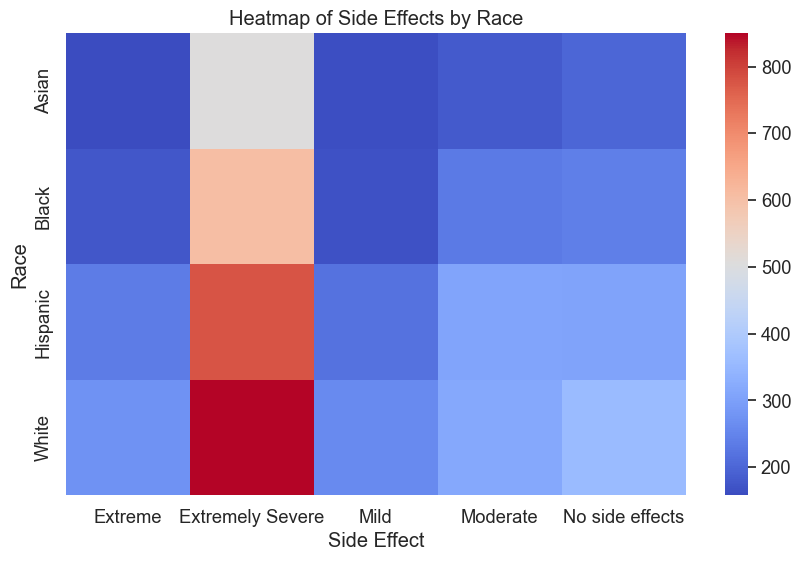

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a crosstab of 'Race' and 'Sideeffect'
ct = pd.crosstab(data2['Race'], data2['Sideeffect'])

# Plot the heatmap
plt.figure(figsize=(10,6))
sns.heatmap(ct, cmap='coolwarm')
plt.title('Heatmap of Side Effects by Race')
plt.xlabel('Side Effect')
plt.ylabel('Race')
plt.show()

From the heatmap, it appears that the ‘White’ race has reported extreme side effects (severity level 5) more frequently than the ‘Asian’ and ‘Black’ races. This is indicated by the dark red color in the ‘White’ row under ‘5’ on the x-axis.

<Axes: xlabel='Race', ylabel='count'>

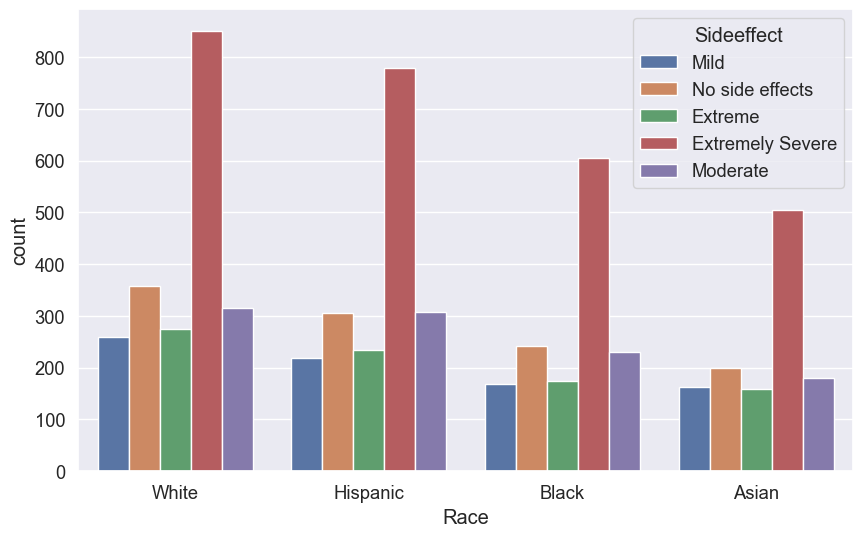

In [66]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Race',hue='Sideeffect',data=data2)

#### White and Hispanic users reported more extreme side effects

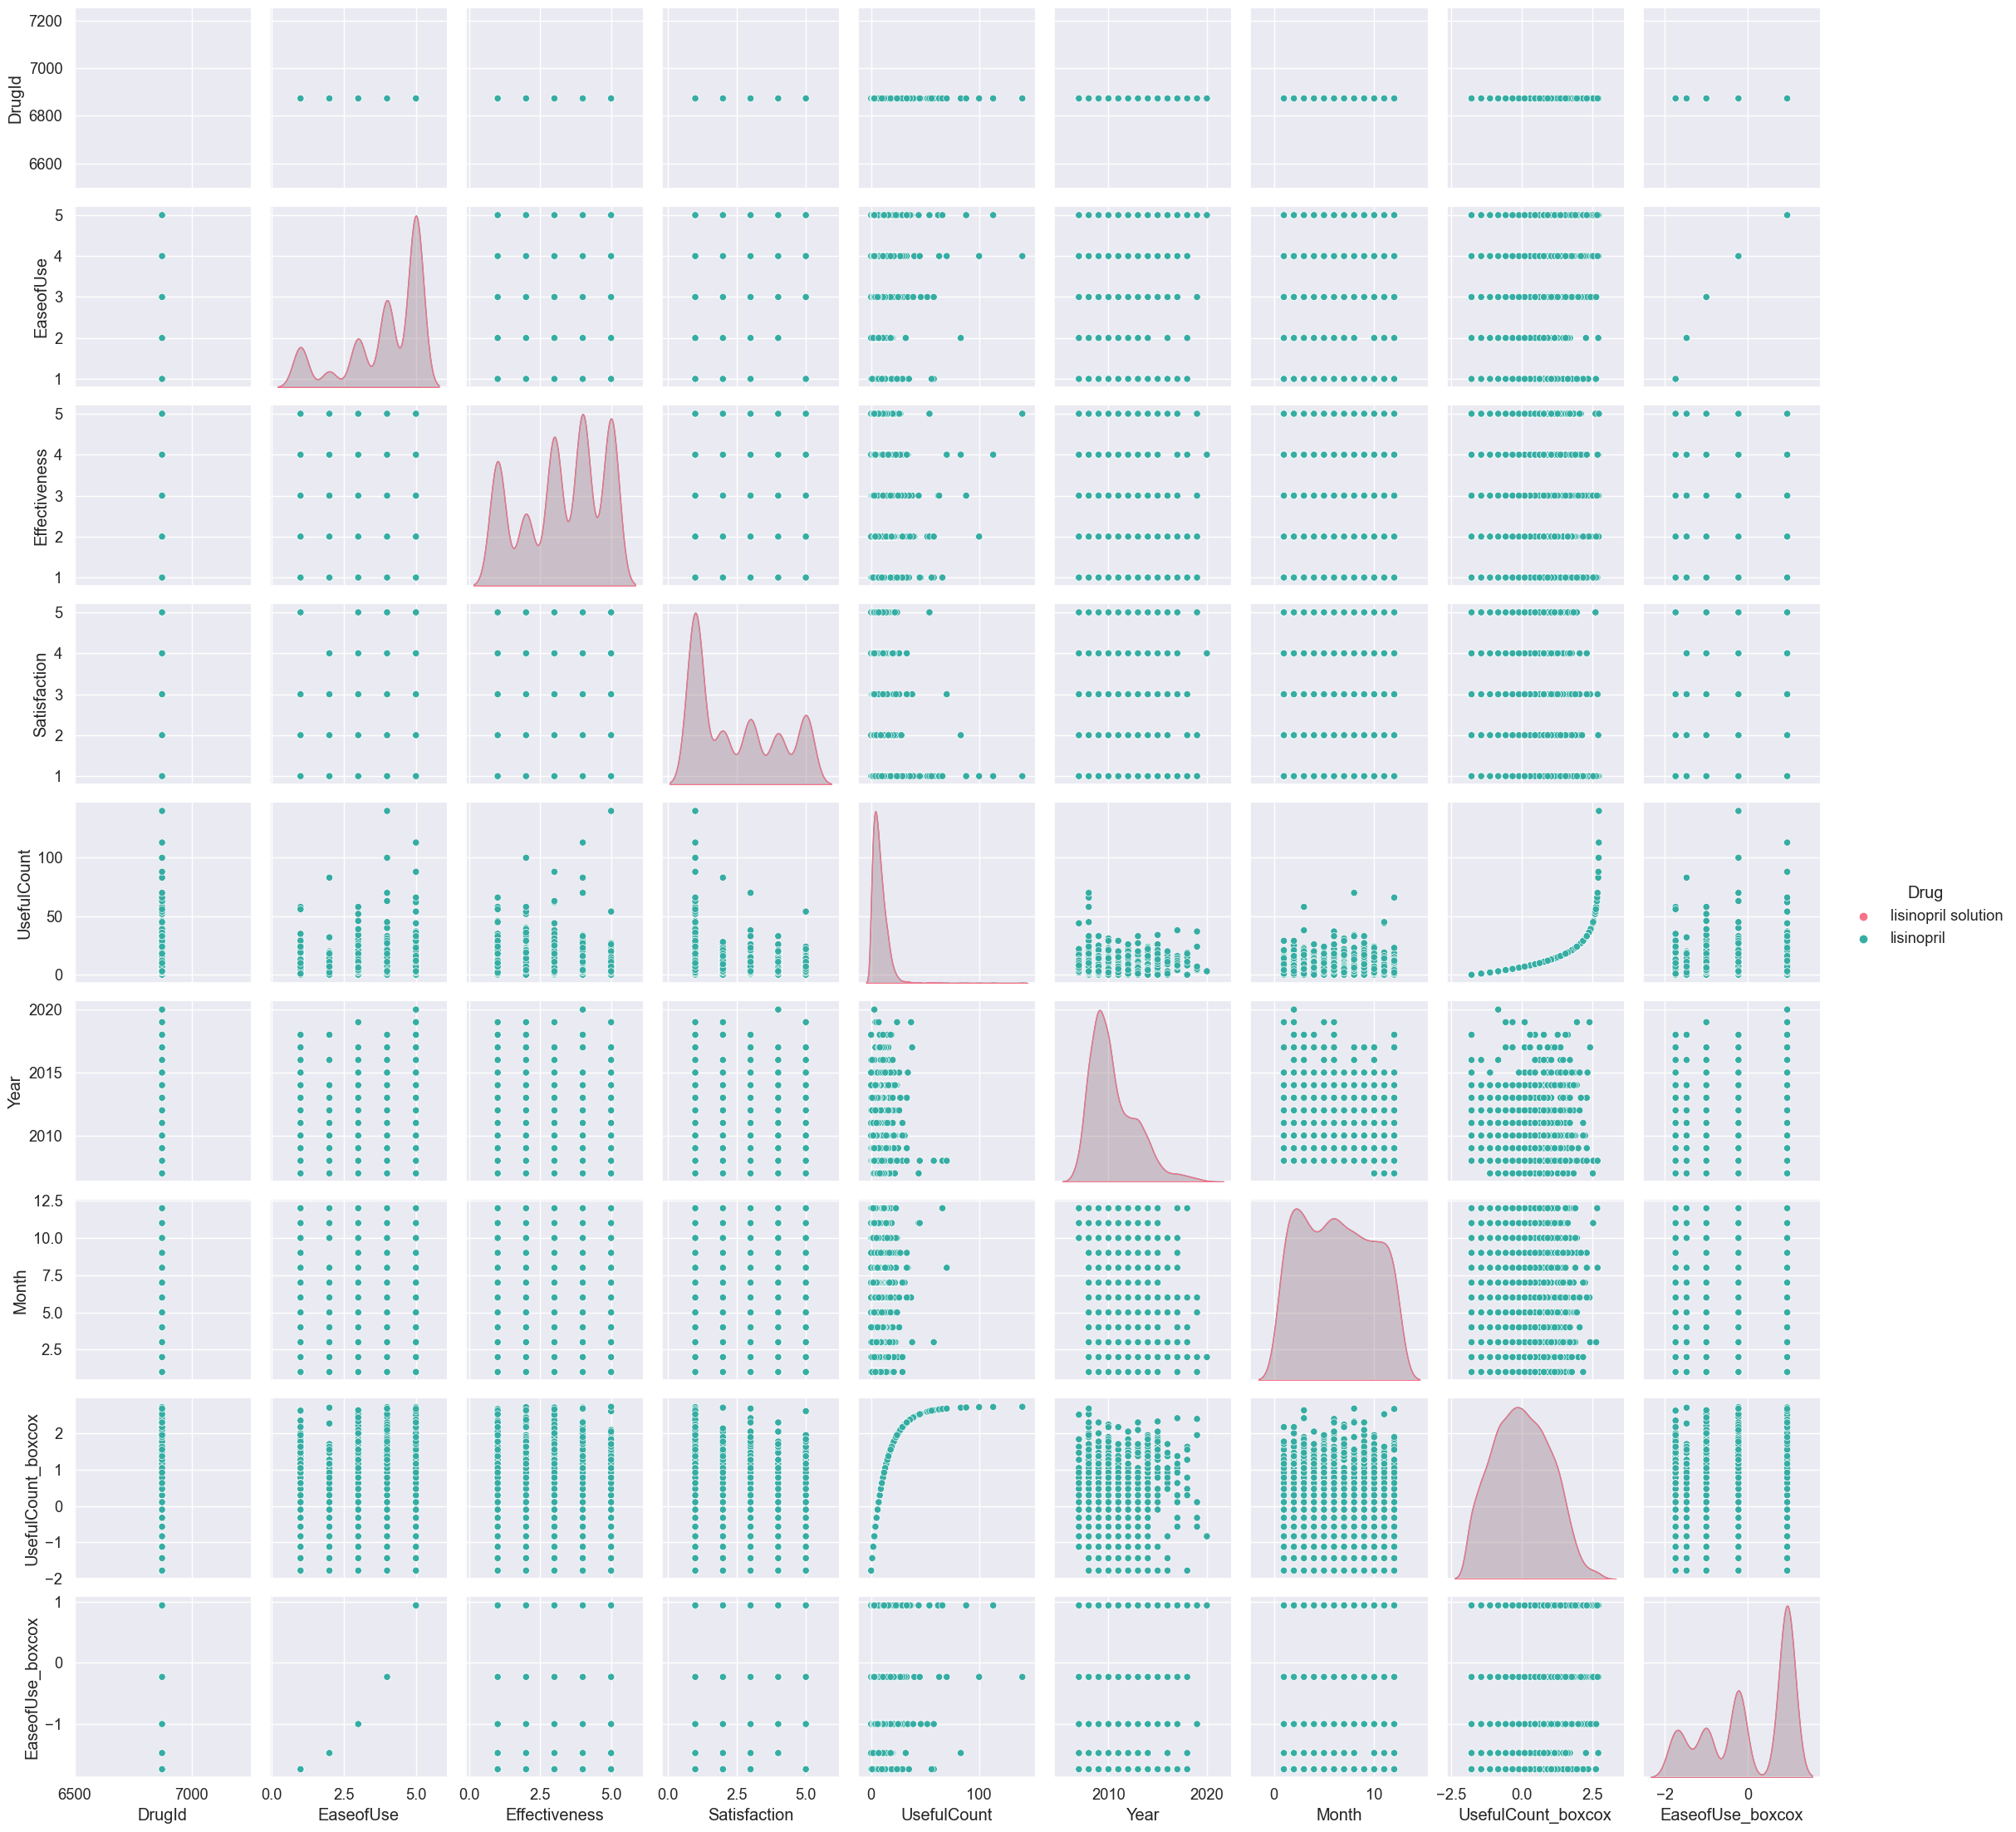

In [67]:
sns.pairplot(data=data2, hue="Drug", palette="husl")

## Reviews

#### Let us look at a sample of Review

In [68]:
data2.Reviews.sample(5)

17121    I' 82 yrs old & felt great but  at yrly physic...
13383                        haven't started taking it yet
11410    My blood pressure skyrocketed to way high.  Dr...
17094    my hands andfeet are cracking by taking lisino...
12846    Been taking nearly 2 months. about the same ti...
Name: Reviews, dtype: object

#### Let us define a function to clean the text in the review so as to generate meaningfull output. The plan is to rank the reviews as either positive or negative. But, so as to rank the reviews, we need a more samples than what we have here. So, we will train the algoithm on the complete parent dataset (containing data about all the medicines). The algorithm will get trained on satisfaction and reviews, which means, it will identify which reviews or specifically word consitutes positive review ( satisfaction > 3) and which one consitute negative reviews (satisfaction < 3). Then, the generated model will be used to generate review rank ( 1 for positve and 0 for negative) for us in our dataset. Kindly note, the review rank for entries where satisfaction > 3 is 1 and for satisfaction < 3 is 0. The entries with satisfaction == 3 will be fed to the model to generate review rank values. Finally, our dataset will be complete after this.

# Cleaning the Global Review column

In [69]:
if data['Reviews'].dtype.kind == "O":
        data['Reviews'] = data['Reviews'].str.strip()

In [70]:
data['Reviews']= data['Reviews'].astype(str)

# Loading Spacy model and defining stopwords

In [71]:
nlp = spacy.load("en_core_web_sm", disable=["ner", "parser"])
STOPWORDS = set(sklearn_stop_words).union(set(stopwords.words("english")))

# Review Cleaning Function

In [72]:
def clean_review(text, STOPWORDS=STOPWORDS, nlp=nlp):
    emoticons_pos = [":)", ":-)", ":p", ":-p", ":P", ":-P", ":D",":-D", ":]", ":-]", ";)", ";-)",
                     ";p", ";-p", ";P", ";-P", ";D", ";-D", ";]", ";-]", "=)", "=-)", "<3"]
    emoticons_neg = [":o", ":-o", ":O", ":-O", ":(", ":-(", ":c", ":-c", ":C", ":-C", ":[", ":-[",
                     ":/", ":-/", ":\\", ":-\\", ":n", ":-n", ":u", ":-u", "=(", "=-(", ":$", ":-$"]
    
    for e in emoticons_pos:
        text = text.replace(e, ' happyemoticon ')
    for e in emoticons_neg:
        text = text.replace(e, ' sademoticon ')
    
    text = ''.join(c for c in text if c not in string.punctuation)
    text = " ".join(word for word in text.split() if word not in STOPWORDS and not word[0].isdigit())
    text = " ".join(tok.lemma_.lower().strip() for tok in nlp(text) if tok.lemma_ != "-PRON-")
    
    return text

#### Review column is cleaned. A new column satisfaction1 is generated which will help in identifiying postive and negative reviews for algorithm where 0 is negative, 2 is positive and 1 is neutral for satisfaction < 3, > 3 and ==3 respectively. We will omit the neutral reviews.

# Creating a DataFrame for ML

In [73]:
%%time

mldf = data[["Satisfaction", "Reviews"]]
mldf["Reviews"] = mldf["Reviews"].apply(clean_review)
mldf["Reviews"].replace("", np.nan, inplace=True)
mldf.dropna(inplace=True)
mldf.reset_index(inplace=True)

CPU times: total: 21min 39s
Wall time: 33min 47s


# Relabeling Satisfaction Levels:

In [74]:
def relabel(x):
    return 0 if x < 3 else 1 if x == 3 else 2

mldf["Satisfaction1"] = mldf["Satisfaction"].apply(relabel)

# Generating Text processing Model

In [75]:
# Train-Test Split

train_set, test_set = train_test_split(mldf, test_size=0.25, random_state=0, stratify=mldf["Satisfaction1"])
train_index = train_set.index
test_index = test_set.index

In [76]:
%%time

# Vectorization and Model Training

vectorizer = TfidfVectorizer(max_features=2500, min_df=10, max_df=0.8)
X_train = vectorizer.fit_transform(train_set["Reviews"])
X_test = vectorizer.transform(test_set["Reviews"])
y_train = train_set["Satisfaction1"].values
y_test = test_set["Satisfaction1"].values

model = RandomForestClassifier(min_samples_split=6, random_state=0)
model.fit(X_train, y_train)

CPU times: total: 28min 34s
Wall time: 31min 48s


RandomForestClassifier(min_samples_split=6, random_state=0)

In [77]:
%%time

# Model Evaluation

acc_train = accuracy_score(y_train, model.predict(X_train))
predictions = model.predict(X_test)
acc_test = accuracy_score(y_test, predictions)
print(f"Accuracy in train set: {acc_train:.2}")
print(f"Accuracy in test set: {acc_test:.2}")
print("\nClassification Report\n", classification_report(y_test, predictions))

Accuracy in train set: 0.99
Accuracy in test set: 0.76

Classification Report
               precision    recall  f1-score   support

           0       0.75      0.79      0.77     32113
           1       0.91      0.32      0.48     10902
           2       0.75      0.86      0.80     37177

    accuracy                           0.76     80192
   macro avg       0.81      0.66      0.68     80192
weighted avg       0.77      0.76      0.75     80192

CPU times: total: 17.2 s
Wall time: 18.4 s


#### We got Test Accuracy of 76%.

# Predicting Satisfaction Rank

In [78]:
def predict_rank(text):
    cleaned_text = [clean_review(text)]
    padded_text = vectorizer.transform(cleaned_text)
    p = model.predict(padded_text)[0]
    return 0 if p == 0 else 1

def predict_rank1(rank):
    return 0 if rank < 3 else 1

data2['Reviews_Rank'] = data2['Satisfaction']
data2.loc[data2['Satisfaction'] < 3, 'Reviews_Rank'] = data2.loc[data2['Satisfaction'] < 3, 'Reviews_Rank'].apply(predict_rank1)
data2.loc[data2['Satisfaction'] > 3, 'Reviews_Rank'] = data2.loc[data2['Satisfaction'] > 3, 'Reviews_Rank'].apply(predict_rank1)
data2.loc[data2['Satisfaction'] == 3, 'Reviews_Rank'] = data2.loc[data2['Satisfaction'] == 3, 'Reviews'].apply(predict_rank)

# Data Preprocessing:

#### Columns Name has unique values so will be dropped. Drug, DrugId, Condition, Date, Easeofuse, usefulcount, sides, Year will be dropped. Race, Sex, Year, Month, Dayofweek will be onehot encoded. Satisfaction will be segregated based on the values as nil, mild, moderate, sever, extreme based on values of 5, 4, 3, 2, 1 respectively. The assumption being that thet satisfaction is a parameter that gets affected by side effects in case of patients.

In [79]:
data2.drop(['Name', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse', 'Sides', 'UsefulCount'], axis=1, inplace=True)
data2.Month = data2.Month.astype(str)
data2.Year = data2.Year.astype(str)
data_encod = data2[['Race', 'Age', 'Gender', 'Month', 'day_of_week']]
data_num = data2[['Effectiveness']]

# Encoding : One Hot Encoding

In [80]:
data_encod = pd.get_dummies(data_encod)
data_encod

Race_Asian  Race_Black  Race_Hispanic  Race_White  Age_0-2  Age_13-18   
9203        False       False          False        True    False      False  \
9209        False       False           True       False    False      False   
9215        False       False          False        True    False      False   
9221        False       False          False        True    False      False   
9227        False       False           True       False    False      False   
...           ...         ...            ...         ...      ...        ...   
18981        True       False          False       False    False      False   
18982        True       False          False       False    False      False   
18984       False       False          False        True    False      False   
18985        True       False          False       False    False      False   
18990        True       False          False       False    False      False   

       Age_19-24  Age_25-34  Age_35-44  Age_45-54  ...  Month_8.0  Month_9.0   
9203       False      False      False      False  ...      False      False  \
9209       False      False      False      False  ...      False      False   
9215       False      False      False      False  ...      False      False   
9221       False      False      False      False  ...      False      False   
9227       False      False      False      False  ...      False      False   
...          ...        ...        ...        ...  ...        ...        ...   
18981      False       True      False      False  ...      False      False   
18982      False      False      False       True  ...      False      False   
18984      False      False      False       True  ...      False      False   
18985      False       True      False      False  ...      False      False   
18990      False      False      False      False  ...      False      False   

       Month_nan  day_of_week_Friday  day_of_week_Monday   
9203       False               False               False  \
9209        True               False               False   
9215        True               False               False   
9221        True               False               False   
9227        True               False               False   
...          ...                 ...                 ...   
18981      False               False               False   
18982      False               False               False   
18984      False                True               False   
18985      False                True               False   
18990      False               False                True   

       day_of_week_Saturday  day_of_week_Sunday  day_of_week_Thursday   
9203                   True               False                 False  \
9209                  False               False                 False   
9215                  False               False                 False   
9221                  False               False                 False   
9227                  False               False                 False   
...                     ...                 ...                   ...   
18981                 False                True                 False   
18982                  True               False                 False   
18984                 False               False                 False   
18985                 False               False                 False   
18990                 False               False                 False   

       day_of_week_Tuesday  day_of_week_Wednesday  
9203                 False                  False  
9209                 False                  False  
9215                 False                  False  
9221                 False                  False  
9227                 False                  False  
...                    ...                    ...  
18981                False                  False  
18982                False                  False  
18984              

## Importing additional libraries

In [81]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import GridSearchCV

# Scaling : Standard Scaling

In [82]:
scaler = StandardScaler()
data_num = scaler.fit_transform(data_num)
data_num = pd.DataFrame(data_num, columns=['Effectiveness'])
data_num

Effectiveness
0          0.517259
1          1.226128
2          1.226128
3          0.517259
4         -1.609348
...             ...
6521      -1.609348
6522      -1.609348
6523       1.226128
6524      -1.609348
6525      -1.609348

[6526 rows x 1 columns]

#### So finally I suppose that the following features which are race, age, review rank and effectiveness can form the dataset which will predict the sideeffect of the user.

In [83]:
data3 = data_encod.copy()
data3['Effectiveness'] = data_num.values
data3['Reviews_Rank'] = data2.Reviews_Rank
data3['UsefulCount_boxcox'] = data_Usefulcount1
data3['EaseofUse_boxcox'] = data_EaseofUse1
data3

Race_Asian  Race_Black  Race_Hispanic  Race_White  Age_0-2  Age_13-18   
9203        False       False          False        True    False      False  \
9209        False       False           True       False    False      False   
9215        False       False          False        True    False      False   
9221        False       False          False        True    False      False   
9227        False       False           True       False    False      False   
...           ...         ...            ...         ...      ...        ...   
18981        True       False          False       False    False      False   
18982        True       False          False       False    False      False   
18984       False       False          False        True    False      False   
18985        True       False          False       False    False      False   
18990        True       False          False       False    False      False   

       Age_19-24  Age_25-34  Age_35-44  Age_45-54  ...  day_of_week_Monday   
9203       False      False      False      False  ...               False  \
9209       False      False      False      False  ...               False   
9215       False      False      False      False  ...               False   
9221       False      False      False      False  ...               False   
9227       False      False      False      False  ...               False   
...          ...        ...        ...        ...  ...                 ...   
18981      False       True      False      False  ...               False   
18982      False      False      False       True  ...               False   
18984      False      False      False       True  ...               False   
18985      False       True      False      False  ...               False   
18990      False      False      False      False  ...                True   

       day_of_week_Saturday  day_of_week_Sunday  day_of_week_Thursday   
9203                   True               False                 False  \
9209                  False               False                 False   
9215                  False               False                 False   
9221                  False               False                 False   
9227                  False               False                 False   
...                     ...                 ...                   ...   
18981                 False                True                 False   
18982                  True               False                 False   
18984                 False               False                 False   
18985                 False               False                 False   
18990                 False               False                 False   

       day_of_week_Tuesday  day_of_week_Wednesday  Effectiveness   
9203                 False                  False       0.517259  \
9209                 False                  False       1.226128   
9215                 False                  False       1.226128   
9221                 False                  False       0.517259   
9227                 False                  False      -1.609348   
...                    ...                    ...            ...   
18981                False                  False      -1.609348   
18982                False                  False      -1.609348   
18984                False                  False       1.226128   
18985                False                  False      -1.609348   
18990                False                  False      -1.609348   

       Reviews_Rank  UsefulCount_boxcox  EaseofUse_boxcox  
9203            1.0           -0.835439          0.943255  
9209            1.0           -0.835439         -0.231105  
9215            1.0           -0.102133          0.943255  
9221            0.0            0.918562         -1.480793  
9227            0.0            1.837785         -1.004962  
...             ...                 ...               .

## data3 forms our final dataset

In [84]:
data4 = pd.DataFrame(data2['Sideeffect'])
data4

Sideeffect
9203               Mild
9209               Mild
9215    No side effects
9221            Extreme
9227   Extremely Severe
...                 ...
18981  Extremely Severe
18982  Extremely Severe
18984              Mild
18985  Extremely Severe
18990  Extremely Severe

[6526 rows x 1 columns]

## data4 forms our target

In [85]:
X_train, X_test, Y_train, Y_test = train_test_split(data3, data4, test_size=0.25, random_state=42, stratify=data4)

# Log Regression

In [86]:
%%time

log_reg = LogisticRegression()
model1 = log_reg.fit(X_train, Y_train)
Y_pred_logreg = model1.predict(X_test)

CPU times: total: 219 ms
Wall time: 464 ms


In [87]:
%%time

# Initialize a dictionary to store the accuracy of each model
accuracy_dict = {}

# Metrics
print("\nModel: Log Regression")
print("\nConfusion Matrix\n", confusion_matrix(Y_test, Y_pred_logreg))
print("\nAccuracy: ", accuracy_score(Y_test, Y_pred_logreg))
accuracy_dict['Logistic Regression'] = accuracy_score(Y_test, Y_pred_logreg)
print("\nClassification Report\n", classification_report(Y_test, Y_pred_logreg))


Model: Log Regression

Confusion Matrix
 [[ 37 173   0   0   0]
 [ 43 642   0   0   0]
 [  0   0  62  81  59]
 [  5  19  20 176  39]
 [  0   0  29  18 229]]

Accuracy:  0.7022058823529411

Classification Report
                   precision    recall  f1-score   support

         Extreme       0.44      0.18      0.25       210
Extremely Severe       0.77      0.94      0.85       685
            Mild       0.56      0.31      0.40       202
        Moderate       0.64      0.68      0.66       259
 No side effects       0.70      0.83      0.76       276

        accuracy                           0.70      1632
       macro avg       0.62      0.59      0.58      1632
    weighted avg       0.67      0.70      0.67      1632

CPU times: total: 0 ns
Wall time: 79.6 ms


# SVM Polynomial

In [88]:
%%time

svm_clf_p = SVC(kernel='poly', degree=4, probability=True)
svm_model = svm_clf_p.fit(X_train, Y_train)
y_pred_svmp = svm_clf_p.predict(X_test)

CPU times: total: 3 s
Wall time: 4.6 s


In [89]:
%%time

print("\nModel: SVM Polynomial")
print("\nConfusion Matrix\n", confusion_matrix(Y_test, y_pred_svmp))
print("\nAccuracy: ", accuracy_score(Y_test, y_pred_svmp))
accuracy_dict['SVM Polynomial'] = accuracy_score(Y_test, y_pred_svmp)
print("\nClassification Report\n", classification_report(Y_test, y_pred_svmp))


Model: SVM Polynomial

Confusion Matrix
 [[ 48 162   0   0   0]
 [ 12 673   0   0   0]
 [  0   0 108  51  43]
 [  7  17  34 171  30]
 [  0   0  39  10 227]]

Accuracy:  0.7518382352941176

Classification Report
                   precision    recall  f1-score   support

         Extreme       0.72      0.23      0.35       210
Extremely Severe       0.79      0.98      0.88       685
            Mild       0.60      0.53      0.56       202
        Moderate       0.74      0.66      0.70       259
 No side effects       0.76      0.82      0.79       276

        accuracy                           0.75      1632
       macro avg       0.72      0.65      0.65      1632
    weighted avg       0.74      0.75      0.73      1632

CPU times: total: 78.1 ms
Wall time: 115 ms


# SVM RBF

In [90]:
%%time

svm_clf_r = SVC(kernel='rbf', probability=True)
svm_model = svm_clf_r.fit(X_train, Y_train)
y_pred_svmr = svm_clf_r.predict(X_test)

CPU times: total: 4.41 s
Wall time: 5.73 s


In [91]:
%%time

print("\nModel: SVM RBF")
print("\nConfusion Matrix\n", confusion_matrix(Y_test, y_pred_svmr))
print("\nAccuracy: ", accuracy_score(Y_test, y_pred_svmr))
accuracy_dict['SVM RBF'] = accuracy_score(Y_test, y_pred_svmr)
print("\nClassification Report\n", classification_report(Y_test, y_pred_svmr))


Model: SVM RBF

Confusion Matrix
 [[ 33 177   0   0   0]
 [ 15 670   0   0   0]
 [  0   0 118  38  46]
 [ 10  14  43 158  34]
 [  0   0  42   8 226]]

Accuracy:  0.7383578431372549

Classification Report
                   precision    recall  f1-score   support

         Extreme       0.57      0.16      0.25       210
Extremely Severe       0.78      0.98      0.87       685
            Mild       0.58      0.58      0.58       202
        Moderate       0.77      0.61      0.68       259
 No side effects       0.74      0.82      0.78       276

        accuracy                           0.74      1632
       macro avg       0.69      0.63      0.63      1632
    weighted avg       0.72      0.74      0.71      1632

CPU times: total: 31.2 ms
Wall time: 83.1 ms


# KNN

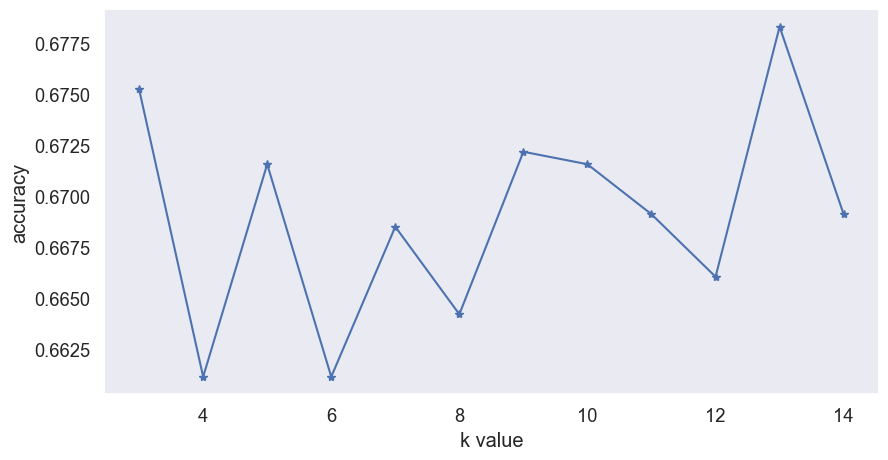

In [92]:
metric_k = []
neighbours = np.arange(3, 15)

for k in neighbours:
    knn = KNeighborsClassifier(n_neighbors=k)
    model2 = knn.fit(X_train, Y_train)
    Y_pred_knn = model2.predict(X_test)
    acc = accuracy_score(Y_test, Y_pred_knn)
    metric_k.append(acc)

plt.plot(neighbours, metric_k, '*-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [93]:
%%time

knn = KNeighborsClassifier(n_neighbors=11)
model2 = knn.fit(X_train, Y_train)
Y_pred_knn = model2.predict(X_test)

CPU times: total: 578 ms
Wall time: 94.7 ms


In [94]:
%%time

print("\nModel: KNN")
print("\nConfusion Matrix\n", confusion_matrix(Y_test, Y_pred_knn))
print("\nAccuracy: ", accuracy_score(Y_test, Y_pred_knn))
accuracy_dict['KNN'] = accuracy_score(Y_test, Y_pred_knn)
print("\nClassification Report\n", classification_report(Y_test, Y_pred_knn))


Model: KNN

Confusion Matrix
 [[ 63 124   5   5  13]
 [ 65 603   3   2  12]
 [  4   4  90  50  54]
 [ 16  32  55 108  48]
 [  0   3  36   9 228]]

Accuracy:  0.6691176470588235

Classification Report
                   precision    recall  f1-score   support

         Extreme       0.43      0.30      0.35       210
Extremely Severe       0.79      0.88      0.83       685
            Mild       0.48      0.45      0.46       202
        Moderate       0.62      0.42      0.50       259
 No side effects       0.64      0.83      0.72       276

        accuracy                           0.67      1632
       macro avg       0.59      0.57      0.57      1632
    weighted avg       0.65      0.67      0.65      1632

CPU times: total: 344 ms
Wall time: 69.8 ms


# Decision Tree

In [95]:
%%time

dtm_clf = DecisionTreeClassifier(random_state=42)
dtm_clf.fit(X_train, Y_train)

CPU times: total: 0 ns
Wall time: 42.1 ms


DecisionTreeClassifier(random_state=42)

In [96]:
%%time

y_pred_dtm = dtm_clf.predict(X_test)
print("\nModel: DecisionTree")
print("\nConfusion Matrix\n", confusion_matrix(Y_test, y_pred_dtm))
print("\nAccuracy: ", accuracy_score(Y_test, y_pred_dtm))
accuracy_dict['Decision Tree'] = accuracy_score(Y_test, y_pred_dtm)
print("\nClassification Report\n", classification_report(Y_test, y_pred_dtm))


Model: DecisionTree

Confusion Matrix
 [[135  66   0   9   0]
 [ 80 595   0  10   0]
 [  0   0 143  29  30]
 [  8   8  44 182  17]
 [  0   0  41  24 211]]

Accuracy:  0.7757352941176471

Classification Report
                   precision    recall  f1-score   support

         Extreme       0.61      0.64      0.62       210
Extremely Severe       0.89      0.87      0.88       685
            Mild       0.63      0.71      0.67       202
        Moderate       0.72      0.70      0.71       259
 No side effects       0.82      0.76      0.79       276

        accuracy                           0.78      1632
       macro avg       0.73      0.74      0.73      1632
    weighted avg       0.78      0.78      0.78      1632

CPU times: total: 31.2 ms
Wall time: 108 ms


# Random Forest

In [97]:
%%time

rfm_clf = RandomForestClassifier(random_state=42)
rfm_clf.fit(X_train, Y_train)

CPU times: total: 531 ms
Wall time: 618 ms


RandomForestClassifier(random_state=42)

In [98]:
%%time

y_pred_rfm = rfm_clf.predict(X_test)
print("\nModel: RandomForest")
print("\nConfusion Matrix\n", confusion_matrix(Y_test, y_pred_rfm))
print("\nAccuracy: ", accuracy_score(Y_test, y_pred_rfm))
accuracy_dict['Random Forest'] = accuracy_score(Y_test, y_pred_rfm)
print("\nClassification Report\n", classification_report(Y_test, y_pred_rfm))


Model: RandomForest

Confusion Matrix
 [[113  95   0   2   0]
 [ 56 627   0   2   0]
 [  0   0 134  31  37]
 [  8  12  35 179  25]
 [  0   0  34  18 224]]

Accuracy:  0.7824754901960784

Classification Report
                   precision    recall  f1-score   support

         Extreme       0.64      0.54      0.58       210
Extremely Severe       0.85      0.92      0.88       685
            Mild       0.66      0.66      0.66       202
        Moderate       0.77      0.69      0.73       259
 No side effects       0.78      0.81      0.80       276

        accuracy                           0.78      1632
       macro avg       0.74      0.72      0.73      1632
    weighted avg       0.78      0.78      0.78      1632

CPU times: total: 62.5 ms
Wall time: 130 ms


In [99]:
# Get feature importances

important_features = pd.Series(rfm_clf.feature_importances_, index=X_train.columns).sort_values(ascending=False) * 100

In [100]:
important_features

Reviews_Rank             24.610575
Effectiveness            19.637986
UsefulCount_boxcox       18.078472
EaseofUse_boxcox          9.148136
Age_45-54                 1.699916
Race_White                1.691595
Race_Hispanic             1.545061
Age_55-64                 1.535857
Race_Asian                1.369694
Race_Black                1.361890
Age_65-74                 1.302217
Month_nan                 1.251222
Age_35-44                 1.247207
Gender_Male               1.035645
Age_75 or over            1.003473
Gender_Female             0.917393
day_of_week_Thursday      0.811698
day_of_week_Tuesday       0.802437
Age_25-34                 0.790436
day_of_week_Wednesday     0.773243
day_of_week_Friday        0.739640
day_of_week_Monday        0.700108
day_of_week_Sunday        0.651284
Month_1.0                 0.642123
Month_2.0                 0.635095
Month_6.0                 0.628049
Month_12.0                0.598090
Month_10.0                0.525096
Month_7.0           

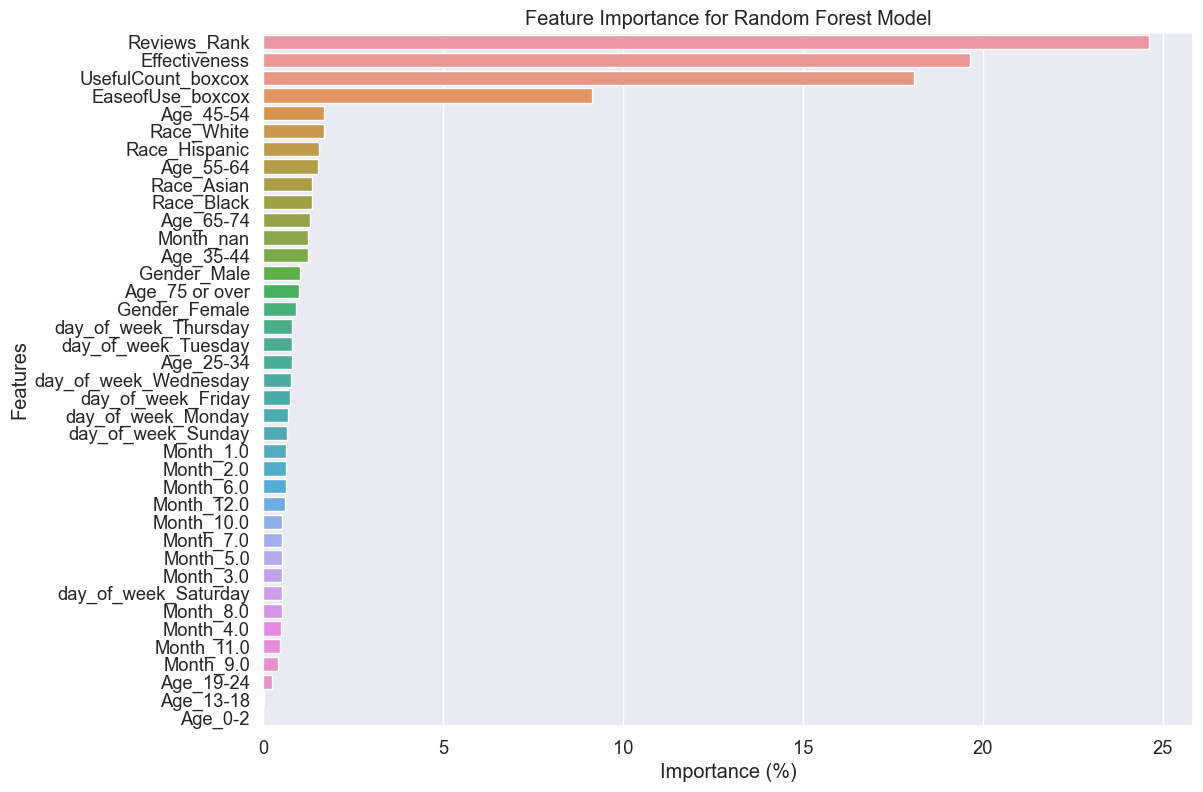

In [101]:
# Plot feature importances
plt.figure(figsize=(12, 9))
sns.barplot(x=important_features.values, y=important_features.index)
plt.xlabel("Importance (%)")
plt.ylabel("Features")
plt.title("Feature Importance for Random Forest Model")
plt.show()

# Naive Bayes

In [102]:
%%time

nb_clf = GaussianNB()
model3 = nb_clf.fit(X_train, Y_train)
Y_pred_nb = model3.predict(X_test)

CPU times: total: 15.6 ms
Wall time: 25.9 ms


In [103]:
%%time

print("\nModel: Naive Bayes")
print("\nConfusion Matrix\n", confusion_matrix(Y_test, Y_pred_nb))
print("\nAccuracy: ", accuracy_score(Y_test, Y_pred_nb))
accuracy_dict['Naive Bayes'] = accuracy_score(Y_test, Y_pred_nb)
print("\nClassification Report\n", classification_report(Y_test, Y_pred_nb))


Model: Naive Bayes

Confusion Matrix
 [[ 79 131   0   0   0]
 [102 581   0   2   0]
 [  0   0 192   0  10]
 [  8  16 219  10   6]
 [  0   0 224   2  50]]

Accuracy:  0.5588235294117647

Classification Report
                   precision    recall  f1-score   support

         Extreme       0.42      0.38      0.40       210
Extremely Severe       0.80      0.85      0.82       685
            Mild       0.30      0.95      0.46       202
        Moderate       0.71      0.04      0.07       259
 No side effects       0.76      0.18      0.29       276

        accuracy                           0.56      1632
       macro avg       0.60      0.48      0.41      1632
    weighted avg       0.67      0.56      0.51      1632

CPU times: total: 46.9 ms
Wall time: 92.1 ms


# HyperTuning Parameters

In [104]:
%%time

# Grid Search for Random Forest
params = {'n_estimators': [1, 10, 100], 'criterion': ['gini', 'entropy'], 'min_samples_leaf': list(range(25, 50)), 'min_samples_split': [2, 3, 4], 'max_features': ['sqrt', 'log2']}
rfc_tuned = RandomForestClassifier()
model_tuning_RF = GridSearchCV(rfc_tuned, param_grid=params, verbose=1, cv=3, scoring='recall')
grid_rf_metrics = model_tuning_RF.fit(X_train, Y_train)

Fitting 3 folds for each of 900 candidates, totalling 2700 fits
CPU times: total: 4min 35s
Wall time: 6min 23s


In [105]:
%%time

y_pred_rfm = model_tuning_RF.predict(X_test)

print("\nModel: Tuned Random Forest")
print("\nConfusion Matrix\n", confusion_matrix(Y_test, y_pred_rfm))
print("\nAccuracy: ", accuracy_score(Y_test, y_pred_rfm))
accuracy_dict['Tuned Random Forest'] = accuracy_score(Y_test, y_pred_rfm)
print("\nClassification Report\n", classification_report(Y_test, y_pred_rfm))


Model: Tuned Random Forest

Confusion Matrix
 [[ 16 152   7  24  11]
 [ 49 587  10  26  13]
 [  2  18  47  70  65]
 [  5  36  30 118  70]
 [  1  10  19  35 211]]

Accuracy:  0.5998774509803921

Classification Report
                   precision    recall  f1-score   support

         Extreme       0.22      0.08      0.11       210
Extremely Severe       0.73      0.86      0.79       685
            Mild       0.42      0.23      0.30       202
        Moderate       0.43      0.46      0.44       259
 No side effects       0.57      0.76      0.65       276

        accuracy                           0.60      1632
       macro avg       0.47      0.48      0.46      1632
    weighted avg       0.55      0.60      0.56      1632

CPU times: total: 46.9 ms
Wall time: 101 ms


In [106]:
print("Best: %f using %s" % (grid_rf_metrics.best_score_, grid_rf_metrics.best_params_))

Best: nan using {'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 25, 'min_samples_split': 2, 'n_estimators': 1}


# Ridge Classifier

In [107]:
%%time

rid_clf = RidgeClassifier()
rid_clf.fit(X_train, Y_train)

CPU times: total: 31.2 ms
Wall time: 31.7 ms


RidgeClassifier()

In [108]:
%%time

y_pred_rid = rid_clf.predict(X_test)

print("\nModel: Ridge Classifier")
print("\nConfusion Matrix\n", confusion_matrix(Y_test, y_pred_rid))
print("\nAccuracy: ", accuracy_score(Y_test, y_pred_rid))
accuracy_dict['Ridge Classifier'] = accuracy_score(Y_test, y_pred_rid)
print("\nClassification Report\n", classification_report(Y_test, y_pred_rid))


Model: Ridge Classifier

Confusion Matrix
 [[  6 204   0   0   0]
 [  3 682   0   0   0]
 [  0   0   5  73 124]
 [  0  24   2 171  62]
 [  0   0   1  16 259]]

Accuracy:  0.6881127450980392

Classification Report
                   precision    recall  f1-score   support

         Extreme       0.67      0.03      0.05       210
Extremely Severe       0.75      1.00      0.86       685
            Mild       0.62      0.02      0.05       202
        Moderate       0.66      0.66      0.66       259
 No side effects       0.58      0.94      0.72       276

        accuracy                           0.69      1632
       macro avg       0.66      0.53      0.47      1632
    weighted avg       0.68      0.69      0.60      1632

CPU times: total: 78.1 ms
Wall time: 110 ms


# Bagging Classifier

In [109]:
%%time

bag_clf = BaggingClassifier()
bag_clf.fit(X_train, Y_train)

CPU times: total: 234 ms
Wall time: 300 ms


BaggingClassifier()

In [110]:
%%time

y_pred_bag = bag_clf.predict(X_test)

print("\nModel: Bagging Classifier")
print("\nConfusion Matrix\n", confusion_matrix(Y_test, y_pred_bag))
print("\nAccuracy: ", accuracy_score(Y_test, y_pred_bag))
accuracy_dict['Bagging Classifier'] = accuracy_score(Y_test, y_pred_bag)
print("\nClassification Report\n", classification_report(Y_test, y_pred_bag))


Model: Bagging Classifier

Confusion Matrix
 [[133  75   0   2   0]
 [ 84 599   0   2   0]
 [  0   0 143  23  36]
 [  9  10  38 180  22]
 [  0   0  33  24 219]]

Accuracy:  0.7806372549019608

Classification Report
                   precision    recall  f1-score   support

         Extreme       0.59      0.63      0.61       210
Extremely Severe       0.88      0.87      0.88       685
            Mild       0.67      0.71      0.69       202
        Moderate       0.78      0.69      0.73       259
 No side effects       0.79      0.79      0.79       276

        accuracy                           0.78      1632
       macro avg       0.74      0.74      0.74      1632
    weighted avg       0.78      0.78      0.78      1632

CPU times: total: 46.9 ms
Wall time: 109 ms


# Gradient Boosting

In [111]:
%%time

grd_clf = GradientBoostingClassifier()
grd_clf.fit(X_train, Y_train)

CPU times: total: 4.36 s
Wall time: 5.1 s


GradientBoostingClassifier()

In [112]:
%%time

y_pred_grd = grd_clf.predict(X_test)

print("\nModel: Gradient Boosting")
print("\nConfusion Matrix\n", confusion_matrix(Y_test, y_pred_grd))
print("\nAccuracy: ", accuracy_score(Y_test, y_pred_grd))
accuracy_dict['Gradient Boosting'] = accuracy_score(Y_test, y_pred_grd)
print("\nClassification Report\n", classification_report(Y_test, y_pred_grd))


Model: Gradient Boosting

Confusion Matrix
 [[ 52 158   0   0   0]
 [ 34 651   0   0   0]
 [  0   0 127  29  46]
 [ 10  14  48 155  32]
 [  0   0  40  11 225]]

Accuracy:  0.741421568627451

Classification Report
                   precision    recall  f1-score   support

         Extreme       0.54      0.25      0.34       210
Extremely Severe       0.79      0.95      0.86       685
            Mild       0.59      0.63      0.61       202
        Moderate       0.79      0.60      0.68       259
 No side effects       0.74      0.82      0.78       276

        accuracy                           0.74      1632
       macro avg       0.69      0.65      0.65      1632
    weighted avg       0.73      0.74      0.72      1632

CPU times: total: 93.8 ms
Wall time: 150 ms


# Analysis of Accuracy of Each Models

In [113]:
from IPython.display import display, Markdown

# Display Results
best_model = None
best_accuracy = 0

display(Markdown("**Analysis Result**"))

for model, accuracy in accuracy_dict.items():
    accuracy_percentage = accuracy * 100
    display(Markdown(f"**Accuracy of {model}: {accuracy_percentage:.2f}%**"))
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

display(Markdown(f"\n**Best model is {best_model} with Accuracy Score: {best_accuracy*100:.2f}%**"))

**Analysis Result**

**Accuracy of Logistic Regression: 70.22%**

**Accuracy of SVM Polynomial: 75.18%**

**Accuracy of SVM RBF: 73.84%**

**Accuracy of KNN: 66.91%**

**Accuracy of Decision Tree: 77.57%**

**Accuracy of Random Forest: 78.25%**

**Accuracy of Naive Bayes: 55.88%**

**Accuracy of Tuned Random Forest: 59.99%**

**Accuracy of Ridge Classifier: 68.81%**

**Accuracy of Bagging Classifier: 78.06%**

**Accuracy of Gradient Boosting: 74.14%**


**Best model is Random Forest with Accuracy Score: 78.25%**

## ROC